In [1]:
import tensorflow as tf
import math
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data as mnist_data
import matplotlib


hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

print("Tensorflow version " + tf.__version__)
tf.set_random_seed(0)

# Load training and eval data
mnist = mnist_data.read_data_sets("data", one_hot=True, reshape=False, validation_size=0)
features = mnist.train.images
labels = np.asarray(mnist.train.labels, dtype=np.int32)
print (features.shape, labels.shape)
features_test = mnist.test.images  # Returns np.array
labels_test = np.asarray(mnist.test.labels, dtype=np.int32)
print (features_test.shape, labels_test.shape)

# Initialize placeholders
x = tf.placeholder(dtype=tf.float32, shape=[None, 28, 28, 1], name="input")
y = tf.placeholder(dtype=tf.int32, shape=[None, 10], name="label")



#The layers of the neural network
conv_1 = tf.layers.conv2d(inputs= x,filters=6, kernel_size=6, padding="SAME",strides=[1,1], activation=tf.nn.relu)
conv_2 = tf.layers.conv2d(inputs=conv_1,filters=12, kernel_size=5, padding="SAME",strides=[2, 2], activation=tf.nn.relu)
conv_3 = tf.layers.conv2d(inputs=conv_2,filters=24, kernel_size=4, padding="SAME",strides=[2, 2], activation=tf.nn.relu)
shape = conv_3.get_shape().as_list()
reshaped = tf.reshape(conv_3, shape=[-1, shape[1] * shape[2] * shape[3]])
dense1 = tf.contrib.layers.fully_connected(reshaped, 200 ,activation_fn=tf.nn.relu,scope='dense1')
logits = tf.contrib.layers.fully_connected(dense1, 10 ,activation_fn=None,scope='dense2')
softmax = tf.nn.softmax(logits, name = "Out")





with tf.name_scope("Loss"):
    # Calcul de la fonction de coût
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,
                                                                     logits=logits, name="cross_entropy"))
    print("loss:", loss)
with tf.name_scope("Train"):
    # La fonction d'optimisation
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    with tf.control_dependencies(update_ops):
        train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

with tf.name_scope("accuracy"):
    # Trouve l'indice de la sortie la plus élevée, donc le label prédit
    pred = tf.argmax(softmax, 1, name="pred")
    true_pred = tf.argmax(y, 1)
    # Calcul le taux de prédiction correct
    correct_prediction = tf.equal(pred, true_pred)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    
    
    
train_loss_results = []
test_loss_result = []
train_accuracy_results = []
test_accuracy_results = []

# Ouverture de la Session TensorFlow
sess = tf.Session()
# Initialisation des variables du modèle
sess.run(tf.global_variables_initializer())

# La boucle d'entrainement
for i in range(10000):
    features, labels = mnist.train.next_batch(100)

    # On appel l'opérateur d'entrainement
    sess.run(train_op, feed_dict={x: features, y: labels})
    # On appel les opérateurs des différentes métriques
    loss_val, accuracy_val = sess.run([loss, accuracy], feed_dict={x: features, y: labels})

    # On récupère le taux de prédiction sur les données test
    test_accuracy_val,test_loss_val = sess.run([accuracy,loss], feed_dict={x: features_test, y: labels_test})

    # On ajoute les valeurs des métrriques de la boucle aux listes
    train_loss_results.append(loss_val*10)
    test_loss_result.append(test_loss_val*10)
    train_accuracy_results.append(accuracy_val)
    test_accuracy_results.append(test_accuracy_val)

    print(" Epoch :", i," Loss: ", loss_val,"Test_Loss: ", test_loss_val)
    print(" Accuracy: ", accuracy_val,"Accuracy Test: ",test_accuracy_val)


Instructions for updating:
Use the retry module or similar alternatives.
b'Hello, TensorFlow!'
Tensorflow version 1.7.0
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data\t10k-images-idx3-ubyte.gz
Extracting data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)
loss: Tensor("Loss/Mean:0", shape=(), dtype=float32)
 Epoch : 0  Loss:  2.27546 Test_Loss:  2.28789
 Accuracy:  0.42 Accuracy Test:  0.2841
 Ep

 Epoch : 62  Loss:  0.22356 Test_Loss:  0.324912
 Accuracy:  0.97 Accuracy Test:  0.9115
 Epoch : 63  Loss:  0.229342 Test_Loss:  0.325678
 Accuracy:  0.94 Accuracy Test:  0.9114
 Epoch : 64  Loss:  0.183169 Test_Loss:  0.328204
 Accuracy:  0.96 Accuracy Test:  0.9094
 Epoch : 65  Loss:  0.258182 Test_Loss:  0.331632
 Accuracy:  0.93 Accuracy Test:  0.9076
 Epoch : 66  Loss:  0.444645 Test_Loss:  0.325964
 Accuracy:  0.9 Accuracy Test:  0.9086
 Epoch : 67  Loss:  0.283281 Test_Loss:  0.318277
 Accuracy:  0.94 Accuracy Test:  0.9104
 Epoch : 68  Loss:  0.359431 Test_Loss:  0.312866
 Accuracy:  0.9 Accuracy Test:  0.9122
 Epoch : 69  Loss:  0.204004 Test_Loss:  0.312631
 Accuracy:  0.93 Accuracy Test:  0.9116
 Epoch : 70  Loss:  0.394415 Test_Loss:  0.310368
 Accuracy:  0.9 Accuracy Test:  0.9121
 Epoch : 71  Loss:  0.361398 Test_Loss:  0.304091
 Accuracy:  0.9 Accuracy Test:  0.9142
 Epoch : 72  Loss:  0.344283 Test_Loss:  0.300323
 Accuracy:  0.9 Accuracy Test:  0.9151
 Epoch : 73  Los

 Epoch : 153  Loss:  0.235362 Test_Loss:  0.169628
 Accuracy:  0.92 Accuracy Test:  0.9499
 Epoch : 154  Loss:  0.108882 Test_Loss:  0.168291
 Accuracy:  0.97 Accuracy Test:  0.9496
 Epoch : 155  Loss:  0.217121 Test_Loss:  0.167367
 Accuracy:  0.92 Accuracy Test:  0.949
 Epoch : 156  Loss:  0.123902 Test_Loss:  0.167849
 Accuracy:  0.98 Accuracy Test:  0.9485
 Epoch : 157  Loss:  0.154187 Test_Loss:  0.171797
 Accuracy:  0.94 Accuracy Test:  0.9469
 Epoch : 158  Loss:  0.155912 Test_Loss:  0.182008
 Accuracy:  0.95 Accuracy Test:  0.9417
 Epoch : 159  Loss:  0.150152 Test_Loss:  0.191761
 Accuracy:  0.96 Accuracy Test:  0.9377
 Epoch : 160  Loss:  0.159828 Test_Loss:  0.190984
 Accuracy:  0.95 Accuracy Test:  0.9389
 Epoch : 161  Loss:  0.214548 Test_Loss:  0.179956
 Accuracy:  0.93 Accuracy Test:  0.9431
 Epoch : 162  Loss:  0.102932 Test_Loss:  0.173248
 Accuracy:  0.96 Accuracy Test:  0.9459
 Epoch : 163  Loss:  0.179665 Test_Loss:  0.165106
 Accuracy:  0.95 Accuracy Test:  0.9482


 Epoch : 244  Loss:  0.0519392 Test_Loss:  0.129978
 Accuracy:  0.98 Accuracy Test:  0.9606
 Epoch : 245  Loss:  0.2477 Test_Loss:  0.124472
 Accuracy:  0.92 Accuracy Test:  0.9625
 Epoch : 246  Loss:  0.0959431 Test_Loss:  0.121554
 Accuracy:  0.98 Accuracy Test:  0.9618
 Epoch : 247  Loss:  0.178715 Test_Loss:  0.120055
 Accuracy:  0.95 Accuracy Test:  0.9617
 Epoch : 248  Loss:  0.111164 Test_Loss:  0.118206
 Accuracy:  0.97 Accuracy Test:  0.9625
 Epoch : 249  Loss:  0.115294 Test_Loss:  0.116215
 Accuracy:  0.96 Accuracy Test:  0.9631
 Epoch : 250  Loss:  0.120212 Test_Loss:  0.115719
 Accuracy:  0.97 Accuracy Test:  0.9635
 Epoch : 251  Loss:  0.089179 Test_Loss:  0.113667
 Accuracy:  0.98 Accuracy Test:  0.9633
 Epoch : 252  Loss:  0.133302 Test_Loss:  0.111603
 Accuracy:  0.96 Accuracy Test:  0.9628
 Epoch : 253  Loss:  0.145644 Test_Loss:  0.109842
 Accuracy:  0.95 Accuracy Test:  0.9641
 Epoch : 254  Loss:  0.179246 Test_Loss:  0.110059
 Accuracy:  0.94 Accuracy Test:  0.9651

 Epoch : 334  Loss:  0.0978821 Test_Loss:  0.102359
 Accuracy:  0.95 Accuracy Test:  0.9679
 Epoch : 335  Loss:  0.150381 Test_Loss:  0.101354
 Accuracy:  0.96 Accuracy Test:  0.9681
 Epoch : 336  Loss:  0.0993318 Test_Loss:  0.0987223
 Accuracy:  0.96 Accuracy Test:  0.9685
 Epoch : 337  Loss:  0.180317 Test_Loss:  0.0912252
 Accuracy:  0.93 Accuracy Test:  0.9706
 Epoch : 338  Loss:  0.0287859 Test_Loss:  0.0857164
 Accuracy:  1.0 Accuracy Test:  0.9722
 Epoch : 339  Loss:  0.260405 Test_Loss:  0.0819918
 Accuracy:  0.97 Accuracy Test:  0.9737
 Epoch : 340  Loss:  0.0734162 Test_Loss:  0.0805725
 Accuracy:  0.96 Accuracy Test:  0.9746
 Epoch : 341  Loss:  0.0330414 Test_Loss:  0.0810151
 Accuracy:  0.99 Accuracy Test:  0.975
 Epoch : 342  Loss:  0.143722 Test_Loss:  0.0827544
 Accuracy:  0.95 Accuracy Test:  0.9746
 Epoch : 343  Loss:  0.0474764 Test_Loss:  0.0850413
 Accuracy:  0.98 Accuracy Test:  0.9738
 Epoch : 344  Loss:  0.13396 Test_Loss:  0.0868925
 Accuracy:  0.95 Accuracy T

 Epoch : 423  Loss:  0.158757 Test_Loss:  0.084202
 Accuracy:  0.95 Accuracy Test:  0.9729
 Epoch : 424  Loss:  0.0455846 Test_Loss:  0.0849414
 Accuracy:  0.98 Accuracy Test:  0.9726
 Epoch : 425  Loss:  0.114836 Test_Loss:  0.0842173
 Accuracy:  0.97 Accuracy Test:  0.9728
 Epoch : 426  Loss:  0.126726 Test_Loss:  0.082356
 Accuracy:  0.98 Accuracy Test:  0.9743
 Epoch : 427  Loss:  0.0674066 Test_Loss:  0.0786328
 Accuracy:  0.98 Accuracy Test:  0.9761
 Epoch : 428  Loss:  0.121807 Test_Loss:  0.0738154
 Accuracy:  0.96 Accuracy Test:  0.9767
 Epoch : 429  Loss:  0.11147 Test_Loss:  0.0708298
 Accuracy:  0.97 Accuracy Test:  0.9779
 Epoch : 430  Loss:  0.0641884 Test_Loss:  0.0720042
 Accuracy:  0.97 Accuracy Test:  0.9778
 Epoch : 431  Loss:  0.0321898 Test_Loss:  0.0762693
 Accuracy:  0.99 Accuracy Test:  0.9766
 Epoch : 432  Loss:  0.0674716 Test_Loss:  0.0821499
 Accuracy:  0.99 Accuracy Test:  0.9743
 Epoch : 433  Loss:  0.110526 Test_Loss:  0.086679
 Accuracy:  0.99 Accuracy T

 Epoch : 512  Loss:  0.0702047 Test_Loss:  0.0714041
 Accuracy:  0.97 Accuracy Test:  0.976
 Epoch : 513  Loss:  0.0741362 Test_Loss:  0.0745796
 Accuracy:  0.98 Accuracy Test:  0.975
 Epoch : 514  Loss:  0.13003 Test_Loss:  0.0767436
 Accuracy:  0.98 Accuracy Test:  0.9747
 Epoch : 515  Loss:  0.0733053 Test_Loss:  0.0758847
 Accuracy:  0.98 Accuracy Test:  0.9752
 Epoch : 516  Loss:  0.0818049 Test_Loss:  0.0739758
 Accuracy:  0.99 Accuracy Test:  0.9753
 Epoch : 517  Loss:  0.0567877 Test_Loss:  0.0714039
 Accuracy:  0.97 Accuracy Test:  0.9759
 Epoch : 518  Loss:  0.0282815 Test_Loss:  0.0691707
 Accuracy:  0.99 Accuracy Test:  0.977
 Epoch : 519  Loss:  0.05971 Test_Loss:  0.0673262
 Accuracy:  0.98 Accuracy Test:  0.9768
 Epoch : 520  Loss:  0.0885525 Test_Loss:  0.065174
 Accuracy:  0.97 Accuracy Test:  0.9768
 Epoch : 521  Loss:  0.0869252 Test_Loss:  0.0632379
 Accuracy:  0.99 Accuracy Test:  0.9781
 Epoch : 522  Loss:  0.0455852 Test_Loss:  0.0622454
 Accuracy:  0.99 Accuracy

 Epoch : 601  Loss:  0.139681 Test_Loss:  0.0791299
 Accuracy:  0.97 Accuracy Test:  0.9758
 Epoch : 602  Loss:  0.0672844 Test_Loss:  0.0761687
 Accuracy:  0.97 Accuracy Test:  0.977
 Epoch : 603  Loss:  0.0972693 Test_Loss:  0.0745922
 Accuracy:  0.98 Accuracy Test:  0.9778
 Epoch : 604  Loss:  0.0690028 Test_Loss:  0.0724249
 Accuracy:  0.98 Accuracy Test:  0.9783
 Epoch : 605  Loss:  0.0730159 Test_Loss:  0.0683464
 Accuracy:  0.97 Accuracy Test:  0.9796
 Epoch : 606  Loss:  0.110866 Test_Loss:  0.0629447
 Accuracy:  0.97 Accuracy Test:  0.9801
 Epoch : 607  Loss:  0.0355742 Test_Loss:  0.059568
 Accuracy:  0.99 Accuracy Test:  0.9807
 Epoch : 608  Loss:  0.0313552 Test_Loss:  0.058037
 Accuracy:  0.99 Accuracy Test:  0.9803
 Epoch : 609  Loss:  0.0228794 Test_Loss:  0.0577925
 Accuracy:  0.99 Accuracy Test:  0.9804
 Epoch : 610  Loss:  0.0599091 Test_Loss:  0.057812
 Accuracy:  0.97 Accuracy Test:  0.98
 Epoch : 611  Loss:  0.088897 Test_Loss:  0.0585124
 Accuracy:  0.95 Accuracy 

 Epoch : 690  Loss:  0.142974 Test_Loss:  0.0515136
 Accuracy:  0.98 Accuracy Test:  0.9827
 Epoch : 691  Loss:  0.0677439 Test_Loss:  0.0514584
 Accuracy:  0.98 Accuracy Test:  0.9826
 Epoch : 692  Loss:  0.0581962 Test_Loss:  0.0524973
 Accuracy:  0.98 Accuracy Test:  0.982
 Epoch : 693  Loss:  0.0844117 Test_Loss:  0.0546178
 Accuracy:  0.98 Accuracy Test:  0.9817
 Epoch : 694  Loss:  0.053323 Test_Loss:  0.054921
 Accuracy:  0.97 Accuracy Test:  0.9813
 Epoch : 695  Loss:  0.0394945 Test_Loss:  0.0549262
 Accuracy:  0.98 Accuracy Test:  0.9819
 Epoch : 696  Loss:  0.0487708 Test_Loss:  0.0534833
 Accuracy:  1.0 Accuracy Test:  0.9822
 Epoch : 697  Loss:  0.0426252 Test_Loss:  0.0523443
 Accuracy:  0.99 Accuracy Test:  0.9826
 Epoch : 698  Loss:  0.0450145 Test_Loss:  0.0517683
 Accuracy:  0.98 Accuracy Test:  0.9821
 Epoch : 699  Loss:  0.0472043 Test_Loss:  0.0521521
 Accuracy:  0.98 Accuracy Test:  0.9821
 Epoch : 700  Loss:  0.0857121 Test_Loss:  0.0526528
 Accuracy:  0.97 Accur

 Epoch : 779  Loss:  0.0834705 Test_Loss:  0.0594443
 Accuracy:  0.96 Accuracy Test:  0.9803
 Epoch : 780  Loss:  0.00931011 Test_Loss:  0.0584017
 Accuracy:  1.0 Accuracy Test:  0.9811
 Epoch : 781  Loss:  0.0469332 Test_Loss:  0.0571022
 Accuracy:  0.99 Accuracy Test:  0.9816
 Epoch : 782  Loss:  0.0164813 Test_Loss:  0.056549
 Accuracy:  1.0 Accuracy Test:  0.9825
 Epoch : 783  Loss:  0.0286584 Test_Loss:  0.0552097
 Accuracy:  1.0 Accuracy Test:  0.9831
 Epoch : 784  Loss:  0.0790664 Test_Loss:  0.054223
 Accuracy:  0.99 Accuracy Test:  0.9831
 Epoch : 785  Loss:  0.0583388 Test_Loss:  0.0535897
 Accuracy:  0.99 Accuracy Test:  0.9834
 Epoch : 786  Loss:  0.0333586 Test_Loss:  0.0545735
 Accuracy:  1.0 Accuracy Test:  0.9828
 Epoch : 787  Loss:  0.0629884 Test_Loss:  0.0558249
 Accuracy:  0.98 Accuracy Test:  0.9819
 Epoch : 788  Loss:  0.0322571 Test_Loss:  0.0580273
 Accuracy:  0.98 Accuracy Test:  0.9808
 Epoch : 789  Loss:  0.0839972 Test_Loss:  0.0602442
 Accuracy:  0.97 Accur

 Epoch : 868  Loss:  0.0830444 Test_Loss:  0.0500411
 Accuracy:  0.96 Accuracy Test:  0.9826
 Epoch : 869  Loss:  0.0384142 Test_Loss:  0.0494992
 Accuracy:  0.99 Accuracy Test:  0.9827
 Epoch : 870  Loss:  0.0709777 Test_Loss:  0.0495555
 Accuracy:  0.99 Accuracy Test:  0.9823
 Epoch : 871  Loss:  0.0370202 Test_Loss:  0.0505556
 Accuracy:  0.99 Accuracy Test:  0.982
 Epoch : 872  Loss:  0.145251 Test_Loss:  0.0502442
 Accuracy:  0.95 Accuracy Test:  0.9821
 Epoch : 873  Loss:  0.0243606 Test_Loss:  0.050014
 Accuracy:  1.0 Accuracy Test:  0.9822
 Epoch : 874  Loss:  0.0289588 Test_Loss:  0.0495819
 Accuracy:  1.0 Accuracy Test:  0.9822
 Epoch : 875  Loss:  0.0233988 Test_Loss:  0.0491872
 Accuracy:  1.0 Accuracy Test:  0.9831
 Epoch : 876  Loss:  0.0211613 Test_Loss:  0.049414
 Accuracy:  1.0 Accuracy Test:  0.9825
 Epoch : 877  Loss:  0.0777677 Test_Loss:  0.0496828
 Accuracy:  0.99 Accuracy Test:  0.9823
 Epoch : 878  Loss:  0.0484179 Test_Loss:  0.049986
 Accuracy:  1.0 Accuracy T

 Epoch : 957  Loss:  0.0202771 Test_Loss:  0.0515927
 Accuracy:  1.0 Accuracy Test:  0.9822
 Epoch : 958  Loss:  0.0241037 Test_Loss:  0.0513051
 Accuracy:  0.99 Accuracy Test:  0.9827
 Epoch : 959  Loss:  0.0632418 Test_Loss:  0.0512228
 Accuracy:  0.96 Accuracy Test:  0.9826
 Epoch : 960  Loss:  0.039651 Test_Loss:  0.0507913
 Accuracy:  0.98 Accuracy Test:  0.9825
 Epoch : 961  Loss:  0.118026 Test_Loss:  0.0498909
 Accuracy:  0.97 Accuracy Test:  0.9826
 Epoch : 962  Loss:  0.0587785 Test_Loss:  0.0496641
 Accuracy:  0.96 Accuracy Test:  0.9832
 Epoch : 963  Loss:  0.0238146 Test_Loss:  0.0491859
 Accuracy:  0.99 Accuracy Test:  0.9835
 Epoch : 964  Loss:  0.0655506 Test_Loss:  0.0481596
 Accuracy:  0.98 Accuracy Test:  0.9838
 Epoch : 965  Loss:  0.0373883 Test_Loss:  0.0466158
 Accuracy:  0.98 Accuracy Test:  0.984
 Epoch : 966  Loss:  0.0299528 Test_Loss:  0.0455215
 Accuracy:  0.99 Accuracy Test:  0.984
 Epoch : 967  Loss:  0.00849225 Test_Loss:  0.0447797
 Accuracy:  1.0 Accur

 Epoch : 1046  Loss:  0.145258 Test_Loss:  0.047057
 Accuracy:  0.96 Accuracy Test:  0.9847
 Epoch : 1047  Loss:  0.0436669 Test_Loss:  0.0472514
 Accuracy:  0.98 Accuracy Test:  0.9852
 Epoch : 1048  Loss:  0.00566473 Test_Loss:  0.0479473
 Accuracy:  1.0 Accuracy Test:  0.9855
 Epoch : 1049  Loss:  0.0777024 Test_Loss:  0.0473273
 Accuracy:  0.98 Accuracy Test:  0.9852
 Epoch : 1050  Loss:  0.0431541 Test_Loss:  0.0462285
 Accuracy:  0.99 Accuracy Test:  0.9855
 Epoch : 1051  Loss:  0.0574742 Test_Loss:  0.0461698
 Accuracy:  0.97 Accuracy Test:  0.985
 Epoch : 1052  Loss:  0.0202024 Test_Loss:  0.0490302
 Accuracy:  1.0 Accuracy Test:  0.9843
 Epoch : 1053  Loss:  0.0138182 Test_Loss:  0.0547339
 Accuracy:  1.0 Accuracy Test:  0.9824
 Epoch : 1054  Loss:  0.111075 Test_Loss:  0.0546489
 Accuracy:  0.97 Accuracy Test:  0.9822
 Epoch : 1055  Loss:  0.0400559 Test_Loss:  0.0546442
 Accuracy:  0.99 Accuracy Test:  0.9817
 Epoch : 1056  Loss:  0.0385148 Test_Loss:  0.053959
 Accuracy:  0

 Epoch : 1134  Loss:  0.0141262 Test_Loss:  0.0468706
 Accuracy:  1.0 Accuracy Test:  0.9834
 Epoch : 1135  Loss:  0.0133326 Test_Loss:  0.0458751
 Accuracy:  1.0 Accuracy Test:  0.9841
 Epoch : 1136  Loss:  0.0715083 Test_Loss:  0.0451989
 Accuracy:  0.98 Accuracy Test:  0.9844
 Epoch : 1137  Loss:  0.107686 Test_Loss:  0.0464606
 Accuracy:  0.97 Accuracy Test:  0.9842
 Epoch : 1138  Loss:  0.0962175 Test_Loss:  0.0479312
 Accuracy:  0.97 Accuracy Test:  0.9847
 Epoch : 1139  Loss:  0.0742802 Test_Loss:  0.04972
 Accuracy:  0.98 Accuracy Test:  0.9846
 Epoch : 1140  Loss:  0.124982 Test_Loss:  0.0505851
 Accuracy:  0.94 Accuracy Test:  0.9845
 Epoch : 1141  Loss:  0.057487 Test_Loss:  0.0497855
 Accuracy:  0.98 Accuracy Test:  0.9847
 Epoch : 1142  Loss:  0.028242 Test_Loss:  0.049692
 Accuracy:  0.99 Accuracy Test:  0.984
 Epoch : 1143  Loss:  0.00731044 Test_Loss:  0.0506253
 Accuracy:  1.0 Accuracy Test:  0.9834
 Epoch : 1144  Loss:  0.156535 Test_Loss:  0.0508074
 Accuracy:  0.96 

 Epoch : 1222  Loss:  0.00808472 Test_Loss:  0.0391795
 Accuracy:  1.0 Accuracy Test:  0.9878
 Epoch : 1223  Loss:  0.056996 Test_Loss:  0.0386239
 Accuracy:  0.96 Accuracy Test:  0.9882
 Epoch : 1224  Loss:  0.0955419 Test_Loss:  0.0380621
 Accuracy:  0.97 Accuracy Test:  0.9884
 Epoch : 1225  Loss:  0.00652391 Test_Loss:  0.0377314
 Accuracy:  1.0 Accuracy Test:  0.988
 Epoch : 1226  Loss:  0.045375 Test_Loss:  0.0367849
 Accuracy:  0.98 Accuracy Test:  0.9877
 Epoch : 1227  Loss:  0.0305012 Test_Loss:  0.0363527
 Accuracy:  0.99 Accuracy Test:  0.9881
 Epoch : 1228  Loss:  0.037246 Test_Loss:  0.0368314
 Accuracy:  0.99 Accuracy Test:  0.9876
 Epoch : 1229  Loss:  0.0115536 Test_Loss:  0.0377494
 Accuracy:  1.0 Accuracy Test:  0.9868
 Epoch : 1230  Loss:  0.0177957 Test_Loss:  0.0389425
 Accuracy:  1.0 Accuracy Test:  0.9863
 Epoch : 1231  Loss:  0.0248785 Test_Loss:  0.0404333
 Accuracy:  0.99 Accuracy Test:  0.9858
 Epoch : 1232  Loss:  0.0211897 Test_Loss:  0.0421603
 Accuracy:  

 Epoch : 1310  Loss:  0.0421546 Test_Loss:  0.0394276
 Accuracy:  0.98 Accuracy Test:  0.9868
 Epoch : 1311  Loss:  0.0436338 Test_Loss:  0.0399413
 Accuracy:  0.99 Accuracy Test:  0.9866
 Epoch : 1312  Loss:  0.0343248 Test_Loss:  0.0408345
 Accuracy:  0.99 Accuracy Test:  0.9866
 Epoch : 1313  Loss:  0.0165454 Test_Loss:  0.0425926
 Accuracy:  0.99 Accuracy Test:  0.9861
 Epoch : 1314  Loss:  0.0117494 Test_Loss:  0.0449938
 Accuracy:  1.0 Accuracy Test:  0.9854
 Epoch : 1315  Loss:  0.0200933 Test_Loss:  0.0477743
 Accuracy:  0.99 Accuracy Test:  0.9848
 Epoch : 1316  Loss:  0.0467445 Test_Loss:  0.0485056
 Accuracy:  0.98 Accuracy Test:  0.9848
 Epoch : 1317  Loss:  0.033367 Test_Loss:  0.0485289
 Accuracy:  0.99 Accuracy Test:  0.9836
 Epoch : 1318  Loss:  0.0540808 Test_Loss:  0.0499918
 Accuracy:  0.98 Accuracy Test:  0.9835
 Epoch : 1319  Loss:  0.00859908 Test_Loss:  0.0517061
 Accuracy:  1.0 Accuracy Test:  0.9835
 Epoch : 1320  Loss:  0.0186803 Test_Loss:  0.0530576
 Accurac

 Epoch : 1398  Loss:  0.141542 Test_Loss:  0.0446077
 Accuracy:  0.97 Accuracy Test:  0.985
 Epoch : 1399  Loss:  0.0567805 Test_Loss:  0.0411304
 Accuracy:  0.98 Accuracy Test:  0.986
 Epoch : 1400  Loss:  0.055856 Test_Loss:  0.0390163
 Accuracy:  0.98 Accuracy Test:  0.9867
 Epoch : 1401  Loss:  0.00819209 Test_Loss:  0.0383996
 Accuracy:  1.0 Accuracy Test:  0.9875
 Epoch : 1402  Loss:  0.0184051 Test_Loss:  0.0388346
 Accuracy:  1.0 Accuracy Test:  0.9873
 Epoch : 1403  Loss:  0.0522278 Test_Loss:  0.0403332
 Accuracy:  0.99 Accuracy Test:  0.9869
 Epoch : 1404  Loss:  0.0258465 Test_Loss:  0.0426275
 Accuracy:  1.0 Accuracy Test:  0.9865
 Epoch : 1405  Loss:  0.051583 Test_Loss:  0.0462803
 Accuracy:  0.99 Accuracy Test:  0.9856
 Epoch : 1406  Loss:  0.104008 Test_Loss:  0.0476552
 Accuracy:  0.99 Accuracy Test:  0.9857
 Epoch : 1407  Loss:  0.00830205 Test_Loss:  0.0486843
 Accuracy:  1.0 Accuracy Test:  0.985
 Epoch : 1408  Loss:  0.178549 Test_Loss:  0.0445966
 Accuracy:  0.95

 Epoch : 1486  Loss:  0.0105329 Test_Loss:  0.0391945
 Accuracy:  1.0 Accuracy Test:  0.987
 Epoch : 1487  Loss:  0.020665 Test_Loss:  0.0408755
 Accuracy:  1.0 Accuracy Test:  0.9866
 Epoch : 1488  Loss:  0.0198009 Test_Loss:  0.0425034
 Accuracy:  0.99 Accuracy Test:  0.986
 Epoch : 1489  Loss:  0.0162403 Test_Loss:  0.0436434
 Accuracy:  1.0 Accuracy Test:  0.9858
 Epoch : 1490  Loss:  0.0155351 Test_Loss:  0.0438114
 Accuracy:  1.0 Accuracy Test:  0.9859
 Epoch : 1491  Loss:  0.0532372 Test_Loss:  0.0413167
 Accuracy:  0.98 Accuracy Test:  0.9867
 Epoch : 1492  Loss:  0.0158815 Test_Loss:  0.0397853
 Accuracy:  1.0 Accuracy Test:  0.9875
 Epoch : 1493  Loss:  0.0367525 Test_Loss:  0.0399808
 Accuracy:  0.98 Accuracy Test:  0.9879
 Epoch : 1494  Loss:  0.0190954 Test_Loss:  0.040943
 Accuracy:  0.99 Accuracy Test:  0.9873
 Epoch : 1495  Loss:  0.0399496 Test_Loss:  0.0414533
 Accuracy:  0.99 Accuracy Test:  0.987
 Epoch : 1496  Loss:  0.0164866 Test_Loss:  0.042404
 Accuracy:  1.0 A

 Epoch : 1574  Loss:  0.0347107 Test_Loss:  0.0354328
 Accuracy:  0.99 Accuracy Test:  0.9869
 Epoch : 1575  Loss:  0.0213256 Test_Loss:  0.034272
 Accuracy:  0.99 Accuracy Test:  0.9874
 Epoch : 1576  Loss:  0.0367254 Test_Loss:  0.0336583
 Accuracy:  0.99 Accuracy Test:  0.9882
 Epoch : 1577  Loss:  0.0497987 Test_Loss:  0.0342487
 Accuracy:  0.98 Accuracy Test:  0.988
 Epoch : 1578  Loss:  0.0210896 Test_Loss:  0.0352336
 Accuracy:  1.0 Accuracy Test:  0.9879
 Epoch : 1579  Loss:  0.014201 Test_Loss:  0.0366579
 Accuracy:  0.99 Accuracy Test:  0.9879
 Epoch : 1580  Loss:  0.00887507 Test_Loss:  0.0382722
 Accuracy:  1.0 Accuracy Test:  0.9871
 Epoch : 1581  Loss:  0.0137253 Test_Loss:  0.0396473
 Accuracy:  1.0 Accuracy Test:  0.9872
 Epoch : 1582  Loss:  0.0151067 Test_Loss:  0.039929
 Accuracy:  1.0 Accuracy Test:  0.9867
 Epoch : 1583  Loss:  0.00865536 Test_Loss:  0.0400024
 Accuracy:  1.0 Accuracy Test:  0.9865
 Epoch : 1584  Loss:  0.0271216 Test_Loss:  0.0399006
 Accuracy:  0

 Epoch : 1662  Loss:  0.0390185 Test_Loss:  0.0442493
 Accuracy:  0.99 Accuracy Test:  0.9852
 Epoch : 1663  Loss:  0.0253564 Test_Loss:  0.0435047
 Accuracy:  0.99 Accuracy Test:  0.9866
 Epoch : 1664  Loss:  0.0341784 Test_Loss:  0.0429007
 Accuracy:  0.99 Accuracy Test:  0.987
 Epoch : 1665  Loss:  0.0102058 Test_Loss:  0.0422617
 Accuracy:  1.0 Accuracy Test:  0.987
 Epoch : 1666  Loss:  0.0285466 Test_Loss:  0.0414266
 Accuracy:  1.0 Accuracy Test:  0.9871
 Epoch : 1667  Loss:  0.00685316 Test_Loss:  0.0406422
 Accuracy:  1.0 Accuracy Test:  0.9876
 Epoch : 1668  Loss:  0.0452558 Test_Loss:  0.0394761
 Accuracy:  0.98 Accuracy Test:  0.9876
 Epoch : 1669  Loss:  0.0387102 Test_Loss:  0.0385691
 Accuracy:  0.98 Accuracy Test:  0.9875
 Epoch : 1670  Loss:  0.00583973 Test_Loss:  0.0381268
 Accuracy:  1.0 Accuracy Test:  0.9871
 Epoch : 1671  Loss:  0.0519668 Test_Loss:  0.0382459
 Accuracy:  0.98 Accuracy Test:  0.9867
 Epoch : 1672  Loss:  0.0128366 Test_Loss:  0.0389096
 Accuracy:

 Epoch : 1750  Loss:  0.0057381 Test_Loss:  0.0443568
 Accuracy:  1.0 Accuracy Test:  0.985
 Epoch : 1751  Loss:  0.0291345 Test_Loss:  0.0457856
 Accuracy:  0.98 Accuracy Test:  0.9846
 Epoch : 1752  Loss:  0.0245186 Test_Loss:  0.0468506
 Accuracy:  0.99 Accuracy Test:  0.9843
 Epoch : 1753  Loss:  0.0163747 Test_Loss:  0.0466475
 Accuracy:  1.0 Accuracy Test:  0.9847
 Epoch : 1754  Loss:  0.0256827 Test_Loss:  0.045584
 Accuracy:  0.99 Accuracy Test:  0.9848
 Epoch : 1755  Loss:  0.0423499 Test_Loss:  0.0411375
 Accuracy:  0.97 Accuracy Test:  0.9863
 Epoch : 1756  Loss:  0.0395662 Test_Loss:  0.0386101
 Accuracy:  0.99 Accuracy Test:  0.9871
 Epoch : 1757  Loss:  0.0146864 Test_Loss:  0.0372721
 Accuracy:  0.99 Accuracy Test:  0.9875
 Epoch : 1758  Loss:  0.025595 Test_Loss:  0.0375215
 Accuracy:  0.99 Accuracy Test:  0.9873
 Epoch : 1759  Loss:  0.0838638 Test_Loss:  0.037922
 Accuracy:  0.98 Accuracy Test:  0.9876
 Epoch : 1760  Loss:  0.0314728 Test_Loss:  0.0395329
 Accuracy:  

 Epoch : 1838  Loss:  0.00721887 Test_Loss:  0.0373389
 Accuracy:  1.0 Accuracy Test:  0.9881
 Epoch : 1839  Loss:  0.0391888 Test_Loss:  0.037001
 Accuracy:  0.97 Accuracy Test:  0.9878
 Epoch : 1840  Loss:  0.00657965 Test_Loss:  0.0370014
 Accuracy:  1.0 Accuracy Test:  0.9877
 Epoch : 1841  Loss:  0.0325542 Test_Loss:  0.036459
 Accuracy:  0.99 Accuracy Test:  0.9873
 Epoch : 1842  Loss:  0.0157149 Test_Loss:  0.0366727
 Accuracy:  0.99 Accuracy Test:  0.9873
 Epoch : 1843  Loss:  0.0237912 Test_Loss:  0.0372862
 Accuracy:  0.99 Accuracy Test:  0.9878
 Epoch : 1844  Loss:  0.0241944 Test_Loss:  0.0374413
 Accuracy:  0.99 Accuracy Test:  0.9877
 Epoch : 1845  Loss:  0.0420604 Test_Loss:  0.0380285
 Accuracy:  0.99 Accuracy Test:  0.9869
 Epoch : 1846  Loss:  0.0190805 Test_Loss:  0.0391689
 Accuracy:  1.0 Accuracy Test:  0.9865
 Epoch : 1847  Loss:  0.0127243 Test_Loss:  0.0407175
 Accuracy:  1.0 Accuracy Test:  0.9863
 Epoch : 1848  Loss:  0.00836922 Test_Loss:  0.0423541
 Accuracy

 Epoch : 1926  Loss:  0.00655675 Test_Loss:  0.0414822
 Accuracy:  1.0 Accuracy Test:  0.9855
 Epoch : 1927  Loss:  0.0690549 Test_Loss:  0.0401645
 Accuracy:  0.98 Accuracy Test:  0.986
 Epoch : 1928  Loss:  0.0165088 Test_Loss:  0.0396379
 Accuracy:  1.0 Accuracy Test:  0.9858
 Epoch : 1929  Loss:  0.0343701 Test_Loss:  0.0395068
 Accuracy:  0.98 Accuracy Test:  0.9866
 Epoch : 1930  Loss:  0.0391034 Test_Loss:  0.0397311
 Accuracy:  0.98 Accuracy Test:  0.9868
 Epoch : 1931  Loss:  0.0638998 Test_Loss:  0.0399026
 Accuracy:  0.98 Accuracy Test:  0.9874
 Epoch : 1932  Loss:  0.024197 Test_Loss:  0.0403197
 Accuracy:  0.99 Accuracy Test:  0.9874
 Epoch : 1933  Loss:  0.0208372 Test_Loss:  0.0409659
 Accuracy:  0.99 Accuracy Test:  0.9867
 Epoch : 1934  Loss:  0.00621641 Test_Loss:  0.0419841
 Accuracy:  1.0 Accuracy Test:  0.9863
 Epoch : 1935  Loss:  0.0178738 Test_Loss:  0.0424186
 Accuracy:  0.99 Accuracy Test:  0.986
 Epoch : 1936  Loss:  0.0241654 Test_Loss:  0.043028
 Accuracy: 

 Epoch : 2014  Loss:  0.0442559 Test_Loss:  0.0423612
 Accuracy:  0.98 Accuracy Test:  0.9865
 Epoch : 2015  Loss:  0.0360168 Test_Loss:  0.042021
 Accuracy:  0.99 Accuracy Test:  0.9856
 Epoch : 2016  Loss:  0.0272214 Test_Loss:  0.0409315
 Accuracy:  0.99 Accuracy Test:  0.9853
 Epoch : 2017  Loss:  0.0167747 Test_Loss:  0.0399519
 Accuracy:  1.0 Accuracy Test:  0.9857
 Epoch : 2018  Loss:  0.00662965 Test_Loss:  0.0392976
 Accuracy:  1.0 Accuracy Test:  0.9862
 Epoch : 2019  Loss:  0.0136134 Test_Loss:  0.038879
 Accuracy:  1.0 Accuracy Test:  0.9866
 Epoch : 2020  Loss:  0.0209622 Test_Loss:  0.0389339
 Accuracy:  1.0 Accuracy Test:  0.9868
 Epoch : 2021  Loss:  0.050336 Test_Loss:  0.0392878
 Accuracy:  0.99 Accuracy Test:  0.9873
 Epoch : 2022  Loss:  0.0687288 Test_Loss:  0.0397456
 Accuracy:  0.99 Accuracy Test:  0.987
 Epoch : 2023  Loss:  0.0419748 Test_Loss:  0.039792
 Accuracy:  0.97 Accuracy Test:  0.987
 Epoch : 2024  Loss:  0.0145639 Test_Loss:  0.0399088
 Accuracy:  0.9

 Epoch : 2102  Loss:  0.056851 Test_Loss:  0.0487707
 Accuracy:  0.98 Accuracy Test:  0.9858
 Epoch : 2103  Loss:  0.0278192 Test_Loss:  0.0493714
 Accuracy:  1.0 Accuracy Test:  0.9853
 Epoch : 2104  Loss:  0.0231157 Test_Loss:  0.0495798
 Accuracy:  0.99 Accuracy Test:  0.9851
 Epoch : 2105  Loss:  0.0612304 Test_Loss:  0.0502539
 Accuracy:  0.99 Accuracy Test:  0.9844
 Epoch : 2106  Loss:  0.0227225 Test_Loss:  0.0496116
 Accuracy:  0.98 Accuracy Test:  0.9846
 Epoch : 2107  Loss:  0.00503153 Test_Loss:  0.049195
 Accuracy:  1.0 Accuracy Test:  0.9845
 Epoch : 2108  Loss:  0.00730221 Test_Loss:  0.0482059
 Accuracy:  1.0 Accuracy Test:  0.9844
 Epoch : 2109  Loss:  0.0196235 Test_Loss:  0.0457892
 Accuracy:  1.0 Accuracy Test:  0.9851
 Epoch : 2110  Loss:  0.0653669 Test_Loss:  0.0429878
 Accuracy:  0.96 Accuracy Test:  0.9855
 Epoch : 2111  Loss:  0.0290008 Test_Loss:  0.0406029
 Accuracy:  0.99 Accuracy Test:  0.9864
 Epoch : 2112  Loss:  0.0309634 Test_Loss:  0.0384232
 Accuracy:

 Epoch : 2190  Loss:  0.0200356 Test_Loss:  0.0450248
 Accuracy:  0.99 Accuracy Test:  0.9864
 Epoch : 2191  Loss:  0.10134 Test_Loss:  0.044097
 Accuracy:  0.99 Accuracy Test:  0.9866
 Epoch : 2192  Loss:  0.00646912 Test_Loss:  0.0433194
 Accuracy:  1.0 Accuracy Test:  0.9867
 Epoch : 2193  Loss:  0.0243436 Test_Loss:  0.0410371
 Accuracy:  1.0 Accuracy Test:  0.9864
 Epoch : 2194  Loss:  0.089135 Test_Loss:  0.0393752
 Accuracy:  0.98 Accuracy Test:  0.9869
 Epoch : 2195  Loss:  0.0145573 Test_Loss:  0.0383769
 Accuracy:  1.0 Accuracy Test:  0.9878
 Epoch : 2196  Loss:  0.0113077 Test_Loss:  0.0377584
 Accuracy:  0.99 Accuracy Test:  0.9881
 Epoch : 2197  Loss:  0.00447824 Test_Loss:  0.0374978
 Accuracy:  1.0 Accuracy Test:  0.988
 Epoch : 2198  Loss:  0.0106923 Test_Loss:  0.0376021
 Accuracy:  1.0 Accuracy Test:  0.9882
 Epoch : 2199  Loss:  0.033492 Test_Loss:  0.0374138
 Accuracy:  0.98 Accuracy Test:  0.9881
 Epoch : 2200  Loss:  0.0016507 Test_Loss:  0.0375458
 Accuracy:  1.0

 Epoch : 2278  Loss:  0.00807869 Test_Loss:  0.0378095
 Accuracy:  1.0 Accuracy Test:  0.9874
 Epoch : 2279  Loss:  0.035544 Test_Loss:  0.0377927
 Accuracy:  0.99 Accuracy Test:  0.9877
 Epoch : 2280  Loss:  0.014262 Test_Loss:  0.0384984
 Accuracy:  0.99 Accuracy Test:  0.9877
 Epoch : 2281  Loss:  0.0180366 Test_Loss:  0.0386538
 Accuracy:  0.99 Accuracy Test:  0.9872
 Epoch : 2282  Loss:  0.0227741 Test_Loss:  0.0386695
 Accuracy:  1.0 Accuracy Test:  0.9876
 Epoch : 2283  Loss:  0.0416837 Test_Loss:  0.0378525
 Accuracy:  0.99 Accuracy Test:  0.9881
 Epoch : 2284  Loss:  0.0127437 Test_Loss:  0.0376228
 Accuracy:  1.0 Accuracy Test:  0.9887
 Epoch : 2285  Loss:  0.0104305 Test_Loss:  0.0369329
 Accuracy:  1.0 Accuracy Test:  0.989
 Epoch : 2286  Loss:  0.0337674 Test_Loss:  0.0366953
 Accuracy:  0.98 Accuracy Test:  0.9884
 Epoch : 2287  Loss:  0.015592 Test_Loss:  0.0364175
 Accuracy:  1.0 Accuracy Test:  0.9884
 Epoch : 2288  Loss:  0.00594397 Test_Loss:  0.0363465
 Accuracy:  1

 Epoch : 2366  Loss:  0.0252441 Test_Loss:  0.0354708
 Accuracy:  0.99 Accuracy Test:  0.9872
 Epoch : 2367  Loss:  0.00870404 Test_Loss:  0.0362814
 Accuracy:  1.0 Accuracy Test:  0.9873
 Epoch : 2368  Loss:  0.0107407 Test_Loss:  0.0367372
 Accuracy:  1.0 Accuracy Test:  0.9877
 Epoch : 2369  Loss:  0.0113904 Test_Loss:  0.0380179
 Accuracy:  1.0 Accuracy Test:  0.9868
 Epoch : 2370  Loss:  0.077693 Test_Loss:  0.0382036
 Accuracy:  0.98 Accuracy Test:  0.9869
 Epoch : 2371  Loss:  0.0190695 Test_Loss:  0.0384133
 Accuracy:  0.99 Accuracy Test:  0.9867
 Epoch : 2372  Loss:  0.0388185 Test_Loss:  0.0379409
 Accuracy:  0.99 Accuracy Test:  0.9868
 Epoch : 2373  Loss:  0.0222009 Test_Loss:  0.0368224
 Accuracy:  0.99 Accuracy Test:  0.9871
 Epoch : 2374  Loss:  0.0188195 Test_Loss:  0.0360891
 Accuracy:  0.99 Accuracy Test:  0.9874
 Epoch : 2375  Loss:  0.00646245 Test_Loss:  0.0354935
 Accuracy:  1.0 Accuracy Test:  0.9877
 Epoch : 2376  Loss:  0.0193022 Test_Loss:  0.0348043
 Accuracy

 Epoch : 2454  Loss:  0.0362933 Test_Loss:  0.0350658
 Accuracy:  0.98 Accuracy Test:  0.9873
 Epoch : 2455  Loss:  0.009753 Test_Loss:  0.0363804
 Accuracy:  1.0 Accuracy Test:  0.9875
 Epoch : 2456  Loss:  0.0193269 Test_Loss:  0.0370396
 Accuracy:  0.99 Accuracy Test:  0.9873
 Epoch : 2457  Loss:  0.00486699 Test_Loss:  0.037881
 Accuracy:  1.0 Accuracy Test:  0.9875
 Epoch : 2458  Loss:  0.0114646 Test_Loss:  0.0385835
 Accuracy:  1.0 Accuracy Test:  0.9872
 Epoch : 2459  Loss:  0.00340754 Test_Loss:  0.0393747
 Accuracy:  1.0 Accuracy Test:  0.9869
 Epoch : 2460  Loss:  0.0123106 Test_Loss:  0.0396519
 Accuracy:  0.99 Accuracy Test:  0.9869
 Epoch : 2461  Loss:  0.020665 Test_Loss:  0.0388935
 Accuracy:  1.0 Accuracy Test:  0.987
 Epoch : 2462  Loss:  0.0445772 Test_Loss:  0.0352496
 Accuracy:  0.99 Accuracy Test:  0.9876
 Epoch : 2463  Loss:  0.0340631 Test_Loss:  0.0325543
 Accuracy:  0.99 Accuracy Test:  0.9881
 Epoch : 2464  Loss:  0.0141375 Test_Loss:  0.0311567
 Accuracy:  1

 Epoch : 2542  Loss:  0.0358104 Test_Loss:  0.028424
 Accuracy:  0.99 Accuracy Test:  0.9904
 Epoch : 2543  Loss:  0.00242503 Test_Loss:  0.0289874
 Accuracy:  1.0 Accuracy Test:  0.9903
 Epoch : 2544  Loss:  0.00236941 Test_Loss:  0.029734
 Accuracy:  1.0 Accuracy Test:  0.9897
 Epoch : 2545  Loss:  0.0422726 Test_Loss:  0.0302854
 Accuracy:  0.98 Accuracy Test:  0.99
 Epoch : 2546  Loss:  0.00404846 Test_Loss:  0.0310588
 Accuracy:  1.0 Accuracy Test:  0.9894
 Epoch : 2547  Loss:  0.00339511 Test_Loss:  0.0320166
 Accuracy:  1.0 Accuracy Test:  0.9893
 Epoch : 2548  Loss:  0.00208812 Test_Loss:  0.0331104
 Accuracy:  1.0 Accuracy Test:  0.9891
 Epoch : 2549  Loss:  0.00712893 Test_Loss:  0.0341329
 Accuracy:  1.0 Accuracy Test:  0.9889
 Epoch : 2550  Loss:  0.00747767 Test_Loss:  0.0351611
 Accuracy:  1.0 Accuracy Test:  0.988
 Epoch : 2551  Loss:  0.063481 Test_Loss:  0.0362355
 Accuracy:  0.99 Accuracy Test:  0.9881
 Epoch : 2552  Loss:  0.0101058 Test_Loss:  0.0367009
 Accuracy:  

 Epoch : 2630  Loss:  0.00914794 Test_Loss:  0.0333911
 Accuracy:  1.0 Accuracy Test:  0.989
 Epoch : 2631  Loss:  0.00892163 Test_Loss:  0.0322395
 Accuracy:  1.0 Accuracy Test:  0.9897
 Epoch : 2632  Loss:  0.00639693 Test_Loss:  0.0316557
 Accuracy:  1.0 Accuracy Test:  0.9899
 Epoch : 2633  Loss:  0.00349916 Test_Loss:  0.0314214
 Accuracy:  1.0 Accuracy Test:  0.9897
 Epoch : 2634  Loss:  0.00734466 Test_Loss:  0.0314029
 Accuracy:  1.0 Accuracy Test:  0.9896
 Epoch : 2635  Loss:  0.0685074 Test_Loss:  0.0312019
 Accuracy:  0.99 Accuracy Test:  0.9895
 Epoch : 2636  Loss:  0.00496771 Test_Loss:  0.0314375
 Accuracy:  1.0 Accuracy Test:  0.9897
 Epoch : 2637  Loss:  0.00146482 Test_Loss:  0.0319677
 Accuracy:  1.0 Accuracy Test:  0.9896
 Epoch : 2638  Loss:  0.0283951 Test_Loss:  0.0323802
 Accuracy:  0.99 Accuracy Test:  0.9894
 Epoch : 2639  Loss:  0.0192374 Test_Loss:  0.032475
 Accuracy:  1.0 Accuracy Test:  0.9889
 Epoch : 2640  Loss:  0.00156206 Test_Loss:  0.0329478
 Accurac

 Epoch : 2718  Loss:  0.0183207 Test_Loss:  0.0430564
 Accuracy:  0.99 Accuracy Test:  0.9853
 Epoch : 2719  Loss:  0.00632619 Test_Loss:  0.0442037
 Accuracy:  1.0 Accuracy Test:  0.9854
 Epoch : 2720  Loss:  0.0477578 Test_Loss:  0.0432815
 Accuracy:  0.98 Accuracy Test:  0.9856
 Epoch : 2721  Loss:  0.00872884 Test_Loss:  0.0427124
 Accuracy:  1.0 Accuracy Test:  0.9861
 Epoch : 2722  Loss:  0.0202026 Test_Loss:  0.0426571
 Accuracy:  0.99 Accuracy Test:  0.986
 Epoch : 2723  Loss:  0.0175318 Test_Loss:  0.0417845
 Accuracy:  0.99 Accuracy Test:  0.9864
 Epoch : 2724  Loss:  0.00241937 Test_Loss:  0.0414026
 Accuracy:  1.0 Accuracy Test:  0.9865
 Epoch : 2725  Loss:  0.0463327 Test_Loss:  0.0397018
 Accuracy:  0.98 Accuracy Test:  0.9868
 Epoch : 2726  Loss:  0.016823 Test_Loss:  0.0376931
 Accuracy:  0.99 Accuracy Test:  0.9868
 Epoch : 2727  Loss:  0.00824659 Test_Loss:  0.0361172
 Accuracy:  1.0 Accuracy Test:  0.9866
 Epoch : 2728  Loss:  0.00485155 Test_Loss:  0.0350189
 Accura

 Epoch : 2806  Loss:  0.00132098 Test_Loss:  0.0403235
 Accuracy:  1.0 Accuracy Test:  0.9871
 Epoch : 2807  Loss:  0.00570342 Test_Loss:  0.0416368
 Accuracy:  1.0 Accuracy Test:  0.9868
 Epoch : 2808  Loss:  0.030658 Test_Loss:  0.0422806
 Accuracy:  0.99 Accuracy Test:  0.9863
 Epoch : 2809  Loss:  0.0141595 Test_Loss:  0.042327
 Accuracy:  1.0 Accuracy Test:  0.9864
 Epoch : 2810  Loss:  0.00941997 Test_Loss:  0.0414641
 Accuracy:  1.0 Accuracy Test:  0.9866
 Epoch : 2811  Loss:  0.0633531 Test_Loss:  0.0409729
 Accuracy:  0.99 Accuracy Test:  0.9865
 Epoch : 2812  Loss:  0.0038147 Test_Loss:  0.0405156
 Accuracy:  1.0 Accuracy Test:  0.9862
 Epoch : 2813  Loss:  0.0123239 Test_Loss:  0.0400152
 Accuracy:  1.0 Accuracy Test:  0.9865
 Epoch : 2814  Loss:  0.00554305 Test_Loss:  0.0398441
 Accuracy:  1.0 Accuracy Test:  0.9868
 Epoch : 2815  Loss:  0.00367068 Test_Loss:  0.0399918
 Accuracy:  1.0 Accuracy Test:  0.987
 Epoch : 2816  Loss:  0.00612798 Test_Loss:  0.0403068
 Accuracy: 

 Epoch : 2894  Loss:  0.0145075 Test_Loss:  0.0290962
 Accuracy:  1.0 Accuracy Test:  0.9903
 Epoch : 2895  Loss:  0.00413403 Test_Loss:  0.0286295
 Accuracy:  1.0 Accuracy Test:  0.9905
 Epoch : 2896  Loss:  0.00920247 Test_Loss:  0.0282321
 Accuracy:  1.0 Accuracy Test:  0.9904
 Epoch : 2897  Loss:  0.00398158 Test_Loss:  0.0280597
 Accuracy:  1.0 Accuracy Test:  0.9903
 Epoch : 2898  Loss:  0.00387463 Test_Loss:  0.028304
 Accuracy:  1.0 Accuracy Test:  0.9898
 Epoch : 2899  Loss:  0.0244821 Test_Loss:  0.0283616
 Accuracy:  0.99 Accuracy Test:  0.9897
 Epoch : 2900  Loss:  0.011074 Test_Loss:  0.0284881
 Accuracy:  1.0 Accuracy Test:  0.989
 Epoch : 2901  Loss:  0.0149459 Test_Loss:  0.0289184
 Accuracy:  1.0 Accuracy Test:  0.9885
 Epoch : 2902  Loss:  0.0411357 Test_Loss:  0.0296425
 Accuracy:  0.98 Accuracy Test:  0.9885
 Epoch : 2903  Loss:  0.00783245 Test_Loss:  0.0303787
 Accuracy:  1.0 Accuracy Test:  0.9882
 Epoch : 2904  Loss:  0.0126787 Test_Loss:  0.0313377
 Accuracy:  

 Epoch : 2982  Loss:  0.00467002 Test_Loss:  0.0377174
 Accuracy:  1.0 Accuracy Test:  0.9884
 Epoch : 2983  Loss:  0.00504296 Test_Loss:  0.0376157
 Accuracy:  1.0 Accuracy Test:  0.9886
 Epoch : 2984  Loss:  0.00304499 Test_Loss:  0.0378207
 Accuracy:  1.0 Accuracy Test:  0.9889
 Epoch : 2985  Loss:  0.0106238 Test_Loss:  0.0384081
 Accuracy:  0.99 Accuracy Test:  0.9884
 Epoch : 2986  Loss:  0.0688736 Test_Loss:  0.0382762
 Accuracy:  0.99 Accuracy Test:  0.9885
 Epoch : 2987  Loss:  0.00578453 Test_Loss:  0.0382348
 Accuracy:  1.0 Accuracy Test:  0.9882
 Epoch : 2988  Loss:  0.0116572 Test_Loss:  0.0388306
 Accuracy:  1.0 Accuracy Test:  0.9883
 Epoch : 2989  Loss:  0.0163254 Test_Loss:  0.0391178
 Accuracy:  1.0 Accuracy Test:  0.988
 Epoch : 2990  Loss:  0.221485 Test_Loss:  0.0383676
 Accuracy:  0.98 Accuracy Test:  0.9888
 Epoch : 2991  Loss:  0.0337257 Test_Loss:  0.0382431
 Accuracy:  0.99 Accuracy Test:  0.9887
 Epoch : 2992  Loss:  0.0124356 Test_Loss:  0.0378304
 Accuracy:

 Epoch : 3070  Loss:  0.024479 Test_Loss:  0.037387
 Accuracy:  0.99 Accuracy Test:  0.9873
 Epoch : 3071  Loss:  0.0074825 Test_Loss:  0.0373636
 Accuracy:  1.0 Accuracy Test:  0.9877
 Epoch : 3072  Loss:  0.00215857 Test_Loss:  0.0376583
 Accuracy:  1.0 Accuracy Test:  0.9879
 Epoch : 3073  Loss:  0.00835122 Test_Loss:  0.0379659
 Accuracy:  1.0 Accuracy Test:  0.9878
 Epoch : 3074  Loss:  0.00769397 Test_Loss:  0.0382028
 Accuracy:  1.0 Accuracy Test:  0.9879
 Epoch : 3075  Loss:  0.0164424 Test_Loss:  0.0379645
 Accuracy:  1.0 Accuracy Test:  0.9876
 Epoch : 3076  Loss:  0.0113796 Test_Loss:  0.0377251
 Accuracy:  0.99 Accuracy Test:  0.9876
 Epoch : 3077  Loss:  0.00144126 Test_Loss:  0.0377681
 Accuracy:  1.0 Accuracy Test:  0.9874
 Epoch : 3078  Loss:  0.00472929 Test_Loss:  0.0379662
 Accuracy:  1.0 Accuracy Test:  0.9876
 Epoch : 3079  Loss:  0.0299787 Test_Loss:  0.03472
 Accuracy:  0.99 Accuracy Test:  0.9885
 Epoch : 3080  Loss:  0.00363161 Test_Loss:  0.0332505
 Accuracy: 

 Epoch : 3158  Loss:  0.0160962 Test_Loss:  0.0362323
 Accuracy:  0.99 Accuracy Test:  0.9889
 Epoch : 3159  Loss:  0.00479355 Test_Loss:  0.0341161
 Accuracy:  1.0 Accuracy Test:  0.989
 Epoch : 3160  Loss:  0.00845707 Test_Loss:  0.0321666
 Accuracy:  1.0 Accuracy Test:  0.9904
 Epoch : 3161  Loss:  0.00527816 Test_Loss:  0.0318012
 Accuracy:  1.0 Accuracy Test:  0.9905
 Epoch : 3162  Loss:  0.00350158 Test_Loss:  0.0323501
 Accuracy:  1.0 Accuracy Test:  0.9891
 Epoch : 3163  Loss:  0.0277233 Test_Loss:  0.032764
 Accuracy:  0.98 Accuracy Test:  0.989
 Epoch : 3164  Loss:  0.00188618 Test_Loss:  0.0335396
 Accuracy:  1.0 Accuracy Test:  0.989
 Epoch : 3165  Loss:  0.00121291 Test_Loss:  0.0345522
 Accuracy:  1.0 Accuracy Test:  0.9889
 Epoch : 3166  Loss:  0.00737051 Test_Loss:  0.0354563
 Accuracy:  1.0 Accuracy Test:  0.9884
 Epoch : 3167  Loss:  0.0298026 Test_Loss:  0.0352032
 Accuracy:  0.98 Accuracy Test:  0.9882
 Epoch : 3168  Loss:  0.00215827 Test_Loss:  0.0352759
 Accuracy

 Epoch : 3246  Loss:  0.0532417 Test_Loss:  0.0344075
 Accuracy:  0.99 Accuracy Test:  0.9887
 Epoch : 3247  Loss:  0.0127746 Test_Loss:  0.0348342
 Accuracy:  1.0 Accuracy Test:  0.9888
 Epoch : 3248  Loss:  0.0172348 Test_Loss:  0.0356168
 Accuracy:  0.99 Accuracy Test:  0.9888
 Epoch : 3249  Loss:  0.0142291 Test_Loss:  0.0364884
 Accuracy:  0.99 Accuracy Test:  0.989
 Epoch : 3250  Loss:  0.011154 Test_Loss:  0.0370006
 Accuracy:  1.0 Accuracy Test:  0.9884
 Epoch : 3251  Loss:  0.00594934 Test_Loss:  0.0373862
 Accuracy:  1.0 Accuracy Test:  0.9882
 Epoch : 3252  Loss:  0.0153451 Test_Loss:  0.0368681
 Accuracy:  1.0 Accuracy Test:  0.9884
 Epoch : 3253  Loss:  0.0240162 Test_Loss:  0.0361414
 Accuracy:  0.99 Accuracy Test:  0.9883
 Epoch : 3254  Loss:  0.00568338 Test_Loss:  0.0355537
 Accuracy:  1.0 Accuracy Test:  0.9885
 Epoch : 3255  Loss:  0.010062 Test_Loss:  0.0354479
 Accuracy:  1.0 Accuracy Test:  0.9887
 Epoch : 3256  Loss:  0.00481132 Test_Loss:  0.035034
 Accuracy:  1

 Epoch : 3334  Loss:  0.000683133 Test_Loss:  0.033658
 Accuracy:  1.0 Accuracy Test:  0.9875
 Epoch : 3335  Loss:  0.00412016 Test_Loss:  0.0337344
 Accuracy:  1.0 Accuracy Test:  0.9874
 Epoch : 3336  Loss:  0.0243402 Test_Loss:  0.032602
 Accuracy:  0.99 Accuracy Test:  0.9882
 Epoch : 3337  Loss:  0.0419086 Test_Loss:  0.0318256
 Accuracy:  0.99 Accuracy Test:  0.9885
 Epoch : 3338  Loss:  0.00407753 Test_Loss:  0.0310965
 Accuracy:  1.0 Accuracy Test:  0.9885
 Epoch : 3339  Loss:  0.00580423 Test_Loss:  0.0305909
 Accuracy:  1.0 Accuracy Test:  0.9885
 Epoch : 3340  Loss:  0.00325099 Test_Loss:  0.0302718
 Accuracy:  1.0 Accuracy Test:  0.9887
 Epoch : 3341  Loss:  0.00229863 Test_Loss:  0.0300787
 Accuracy:  1.0 Accuracy Test:  0.9888
 Epoch : 3342  Loss:  0.00210645 Test_Loss:  0.0299935
 Accuracy:  1.0 Accuracy Test:  0.9892
 Epoch : 3343  Loss:  0.00555076 Test_Loss:  0.0298206
 Accuracy:  1.0 Accuracy Test:  0.9891
 Epoch : 3344  Loss:  0.000324673 Test_Loss:  0.0297698
 Accu

 Epoch : 3422  Loss:  0.0352323 Test_Loss:  0.0299897
 Accuracy:  0.99 Accuracy Test:  0.9898
 Epoch : 3423  Loss:  0.0105763 Test_Loss:  0.0295734
 Accuracy:  1.0 Accuracy Test:  0.9899
 Epoch : 3424  Loss:  0.00627828 Test_Loss:  0.0292899
 Accuracy:  1.0 Accuracy Test:  0.99
 Epoch : 3425  Loss:  0.00872641 Test_Loss:  0.0288362
 Accuracy:  1.0 Accuracy Test:  0.99
 Epoch : 3426  Loss:  0.00421299 Test_Loss:  0.0285221
 Accuracy:  1.0 Accuracy Test:  0.9901
 Epoch : 3427  Loss:  0.00834606 Test_Loss:  0.0283462
 Accuracy:  1.0 Accuracy Test:  0.9901
 Epoch : 3428  Loss:  0.0029721 Test_Loss:  0.028596
 Accuracy:  1.0 Accuracy Test:  0.9901
 Epoch : 3429  Loss:  0.0074377 Test_Loss:  0.0288747
 Accuracy:  1.0 Accuracy Test:  0.9897
 Epoch : 3430  Loss:  0.00285756 Test_Loss:  0.0294758
 Accuracy:  1.0 Accuracy Test:  0.9897
 Epoch : 3431  Loss:  0.0120913 Test_Loss:  0.0301962
 Accuracy:  0.99 Accuracy Test:  0.9894
 Epoch : 3432  Loss:  0.00118745 Test_Loss:  0.0310112
 Accuracy:  1

 Epoch : 3510  Loss:  0.00697883 Test_Loss:  0.0333601
 Accuracy:  1.0 Accuracy Test:  0.9894
 Epoch : 3511  Loss:  0.0166735 Test_Loss:  0.033599
 Accuracy:  0.99 Accuracy Test:  0.9895
 Epoch : 3512  Loss:  0.0150801 Test_Loss:  0.0339201
 Accuracy:  1.0 Accuracy Test:  0.9899
 Epoch : 3513  Loss:  0.0103845 Test_Loss:  0.034418
 Accuracy:  1.0 Accuracy Test:  0.9898
 Epoch : 3514  Loss:  0.00489609 Test_Loss:  0.0351096
 Accuracy:  1.0 Accuracy Test:  0.9895
 Epoch : 3515  Loss:  0.0148219 Test_Loss:  0.0356296
 Accuracy:  1.0 Accuracy Test:  0.9894
 Epoch : 3516  Loss:  0.00968246 Test_Loss:  0.0363178
 Accuracy:  1.0 Accuracy Test:  0.9898
 Epoch : 3517  Loss:  0.00854945 Test_Loss:  0.0369962
 Accuracy:  0.99 Accuracy Test:  0.9896
 Epoch : 3518  Loss:  0.00164341 Test_Loss:  0.0379471
 Accuracy:  1.0 Accuracy Test:  0.9893
 Epoch : 3519  Loss:  0.0124606 Test_Loss:  0.0386809
 Accuracy:  1.0 Accuracy Test:  0.989
 Epoch : 3520  Loss:  0.00533623 Test_Loss:  0.0392006
 Accuracy: 

 Epoch : 3598  Loss:  0.00152316 Test_Loss:  0.0309107
 Accuracy:  1.0 Accuracy Test:  0.9896
 Epoch : 3599  Loss:  0.170441 Test_Loss:  0.0315966
 Accuracy:  0.98 Accuracy Test:  0.989
 Epoch : 3600  Loss:  0.00427144 Test_Loss:  0.0326477
 Accuracy:  1.0 Accuracy Test:  0.9888
 Epoch : 3601  Loss:  0.00433248 Test_Loss:  0.0337908
 Accuracy:  1.0 Accuracy Test:  0.9887
 Epoch : 3602  Loss:  0.00882486 Test_Loss:  0.0346426
 Accuracy:  0.99 Accuracy Test:  0.9889
 Epoch : 3603  Loss:  0.0350215 Test_Loss:  0.0348832
 Accuracy:  0.99 Accuracy Test:  0.9888
 Epoch : 3604  Loss:  0.00707413 Test_Loss:  0.0351722
 Accuracy:  1.0 Accuracy Test:  0.9889
 Epoch : 3605  Loss:  0.000891996 Test_Loss:  0.0356683
 Accuracy:  1.0 Accuracy Test:  0.9891
 Epoch : 3606  Loss:  0.0193878 Test_Loss:  0.0356513
 Accuracy:  0.99 Accuracy Test:  0.9888
 Epoch : 3607  Loss:  0.00777939 Test_Loss:  0.0357763
 Accuracy:  1.0 Accuracy Test:  0.9884
 Epoch : 3608  Loss:  0.0134165 Test_Loss:  0.0355862
 Accur

 Epoch : 3686  Loss:  0.00139565 Test_Loss:  0.0298821
 Accuracy:  1.0 Accuracy Test:  0.9907
 Epoch : 3687  Loss:  0.0080459 Test_Loss:  0.0300317
 Accuracy:  1.0 Accuracy Test:  0.9904
 Epoch : 3688  Loss:  0.00140875 Test_Loss:  0.0303108
 Accuracy:  1.0 Accuracy Test:  0.9902
 Epoch : 3689  Loss:  0.000429383 Test_Loss:  0.0306822
 Accuracy:  1.0 Accuracy Test:  0.9899
 Epoch : 3690  Loss:  0.00339894 Test_Loss:  0.030997
 Accuracy:  1.0 Accuracy Test:  0.9902
 Epoch : 3691  Loss:  0.0268275 Test_Loss:  0.0315385
 Accuracy:  0.99 Accuracy Test:  0.9899
 Epoch : 3692  Loss:  0.00596931 Test_Loss:  0.0323972
 Accuracy:  1.0 Accuracy Test:  0.9895
 Epoch : 3693  Loss:  0.0159457 Test_Loss:  0.0338625
 Accuracy:  0.99 Accuracy Test:  0.9886
 Epoch : 3694  Loss:  0.00191021 Test_Loss:  0.0358683
 Accuracy:  1.0 Accuracy Test:  0.9881
 Epoch : 3695  Loss:  0.00944952 Test_Loss:  0.0372945
 Accuracy:  1.0 Accuracy Test:  0.9878
 Epoch : 3696  Loss:  0.00837179 Test_Loss:  0.0385686
 Accur

 Epoch : 3774  Loss:  0.00941026 Test_Loss:  0.0351646
 Accuracy:  1.0 Accuracy Test:  0.9891
 Epoch : 3775  Loss:  0.0168915 Test_Loss:  0.0342199
 Accuracy:  0.99 Accuracy Test:  0.9895
 Epoch : 3776  Loss:  0.0264773 Test_Loss:  0.0332722
 Accuracy:  0.99 Accuracy Test:  0.9898
 Epoch : 3777  Loss:  0.00125694 Test_Loss:  0.0327286
 Accuracy:  1.0 Accuracy Test:  0.9897
 Epoch : 3778  Loss:  0.00180825 Test_Loss:  0.032471
 Accuracy:  1.0 Accuracy Test:  0.9895
 Epoch : 3779  Loss:  0.00401262 Test_Loss:  0.0322176
 Accuracy:  1.0 Accuracy Test:  0.9898
 Epoch : 3780  Loss:  0.000682012 Test_Loss:  0.0321415
 Accuracy:  1.0 Accuracy Test:  0.9899
 Epoch : 3781  Loss:  0.00612371 Test_Loss:  0.0321343
 Accuracy:  1.0 Accuracy Test:  0.9898
 Epoch : 3782  Loss:  0.00213071 Test_Loss:  0.0322646
 Accuracy:  1.0 Accuracy Test:  0.9897
 Epoch : 3783  Loss:  0.00293792 Test_Loss:  0.0324411
 Accuracy:  1.0 Accuracy Test:  0.9898
 Epoch : 3784  Loss:  0.00233283 Test_Loss:  0.0326073
 Accu

 Epoch : 3862  Loss:  0.0030503 Test_Loss:  0.0350702
 Accuracy:  1.0 Accuracy Test:  0.9884
 Epoch : 3863  Loss:  0.000793594 Test_Loss:  0.0367234
 Accuracy:  1.0 Accuracy Test:  0.9881
 Epoch : 3864  Loss:  0.0162622 Test_Loss:  0.0376834
 Accuracy:  0.99 Accuracy Test:  0.9879
 Epoch : 3865  Loss:  0.00148785 Test_Loss:  0.0388793
 Accuracy:  1.0 Accuracy Test:  0.9877
 Epoch : 3866  Loss:  0.0103608 Test_Loss:  0.0393885
 Accuracy:  1.0 Accuracy Test:  0.9879
 Epoch : 3867  Loss:  0.00371301 Test_Loss:  0.0392397
 Accuracy:  1.0 Accuracy Test:  0.9881
 Epoch : 3868  Loss:  0.00624636 Test_Loss:  0.0372519
 Accuracy:  1.0 Accuracy Test:  0.988
 Epoch : 3869  Loss:  0.00832947 Test_Loss:  0.0359107
 Accuracy:  1.0 Accuracy Test:  0.9883
 Epoch : 3870  Loss:  0.0134014 Test_Loss:  0.0340402
 Accuracy:  0.99 Accuracy Test:  0.989
 Epoch : 3871  Loss:  0.0246063 Test_Loss:  0.032706
 Accuracy:  0.99 Accuracy Test:  0.9891
 Epoch : 3872  Loss:  0.00365354 Test_Loss:  0.0323635
 Accuracy

 Epoch : 3950  Loss:  0.00210619 Test_Loss:  0.032779
 Accuracy:  1.0 Accuracy Test:  0.9892
 Epoch : 3951  Loss:  0.000828196 Test_Loss:  0.0341469
 Accuracy:  1.0 Accuracy Test:  0.9891
 Epoch : 3952  Loss:  0.00692555 Test_Loss:  0.0348851
 Accuracy:  1.0 Accuracy Test:  0.9892
 Epoch : 3953  Loss:  0.0167088 Test_Loss:  0.0334855
 Accuracy:  0.99 Accuracy Test:  0.9893
 Epoch : 3954  Loss:  0.00123139 Test_Loss:  0.0328718
 Accuracy:  1.0 Accuracy Test:  0.9892
 Epoch : 3955  Loss:  0.00531413 Test_Loss:  0.0329463
 Accuracy:  1.0 Accuracy Test:  0.9888
 Epoch : 3956  Loss:  0.00145945 Test_Loss:  0.0335862
 Accuracy:  1.0 Accuracy Test:  0.9892
 Epoch : 3957  Loss:  0.00675087 Test_Loss:  0.0350302
 Accuracy:  1.0 Accuracy Test:  0.9884
 Epoch : 3958  Loss:  0.000733193 Test_Loss:  0.0373811
 Accuracy:  1.0 Accuracy Test:  0.988
 Epoch : 3959  Loss:  0.00534412 Test_Loss:  0.0397988
 Accuracy:  1.0 Accuracy Test:  0.9873
 Epoch : 3960  Loss:  0.088202 Test_Loss:  0.0406662
 Accura

 Epoch : 4038  Loss:  0.00554664 Test_Loss:  0.0341617
 Accuracy:  1.0 Accuracy Test:  0.9889
 Epoch : 4039  Loss:  0.00738915 Test_Loss:  0.0338157
 Accuracy:  1.0 Accuracy Test:  0.9891
 Epoch : 4040  Loss:  0.00148907 Test_Loss:  0.0340572
 Accuracy:  1.0 Accuracy Test:  0.9888
 Epoch : 4041  Loss:  0.0071541 Test_Loss:  0.0347253
 Accuracy:  1.0 Accuracy Test:  0.9884
 Epoch : 4042  Loss:  0.00125092 Test_Loss:  0.0356499
 Accuracy:  1.0 Accuracy Test:  0.9878
 Epoch : 4043  Loss:  0.00367618 Test_Loss:  0.0365251
 Accuracy:  1.0 Accuracy Test:  0.9871
 Epoch : 4044  Loss:  0.0443363 Test_Loss:  0.0364249
 Accuracy:  0.98 Accuracy Test:  0.9876
 Epoch : 4045  Loss:  0.00111207 Test_Loss:  0.0363901
 Accuracy:  1.0 Accuracy Test:  0.9881
 Epoch : 4046  Loss:  0.0117267 Test_Loss:  0.0360506
 Accuracy:  1.0 Accuracy Test:  0.9881
 Epoch : 4047  Loss:  0.00110543 Test_Loss:  0.035882
 Accuracy:  1.0 Accuracy Test:  0.988
 Epoch : 4048  Loss:  0.00709434 Test_Loss:  0.0351927
 Accuracy

 Epoch : 4126  Loss:  0.0203988 Test_Loss:  0.0376304
 Accuracy:  0.99 Accuracy Test:  0.9889
 Epoch : 4127  Loss:  0.0255184 Test_Loss:  0.0385127
 Accuracy:  0.99 Accuracy Test:  0.9888
 Epoch : 4128  Loss:  0.0225426 Test_Loss:  0.0392688
 Accuracy:  0.99 Accuracy Test:  0.9887
 Epoch : 4129  Loss:  0.00514649 Test_Loss:  0.0396849
 Accuracy:  1.0 Accuracy Test:  0.9887
 Epoch : 4130  Loss:  0.0410553 Test_Loss:  0.040037
 Accuracy:  0.98 Accuracy Test:  0.9882
 Epoch : 4131  Loss:  0.00580948 Test_Loss:  0.0410079
 Accuracy:  1.0 Accuracy Test:  0.988
 Epoch : 4132  Loss:  0.00732711 Test_Loss:  0.0408166
 Accuracy:  1.0 Accuracy Test:  0.9884
 Epoch : 4133  Loss:  0.0115401 Test_Loss:  0.0406032
 Accuracy:  0.99 Accuracy Test:  0.9881
 Epoch : 4134  Loss:  0.00728088 Test_Loss:  0.0406612
 Accuracy:  1.0 Accuracy Test:  0.9874
 Epoch : 4135  Loss:  0.00220104 Test_Loss:  0.0410356
 Accuracy:  1.0 Accuracy Test:  0.9875
 Epoch : 4136  Loss:  0.0167905 Test_Loss:  0.0418051
 Accurac

 Epoch : 4214  Loss:  0.00526285 Test_Loss:  0.0332245
 Accuracy:  1.0 Accuracy Test:  0.9897
 Epoch : 4215  Loss:  0.00389018 Test_Loss:  0.0339877
 Accuracy:  1.0 Accuracy Test:  0.9897
 Epoch : 4216  Loss:  0.00247954 Test_Loss:  0.0346756
 Accuracy:  1.0 Accuracy Test:  0.9895
 Epoch : 4217  Loss:  0.00544769 Test_Loss:  0.0351289
 Accuracy:  1.0 Accuracy Test:  0.9897
 Epoch : 4218  Loss:  0.00386816 Test_Loss:  0.0355646
 Accuracy:  1.0 Accuracy Test:  0.9896
 Epoch : 4219  Loss:  0.00095387 Test_Loss:  0.0360555
 Accuracy:  1.0 Accuracy Test:  0.9892
 Epoch : 4220  Loss:  0.00136928 Test_Loss:  0.0365736
 Accuracy:  1.0 Accuracy Test:  0.9893
 Epoch : 4221  Loss:  0.001849 Test_Loss:  0.0370376
 Accuracy:  1.0 Accuracy Test:  0.9895
 Epoch : 4222  Loss:  0.00292865 Test_Loss:  0.0375538
 Accuracy:  1.0 Accuracy Test:  0.9892
 Epoch : 4223  Loss:  0.00479797 Test_Loss:  0.0380208
 Accuracy:  1.0 Accuracy Test:  0.9887
 Epoch : 4224  Loss:  0.00306333 Test_Loss:  0.0382399
 Accura

 Epoch : 4302  Loss:  0.0162774 Test_Loss:  0.0307257
 Accuracy:  0.99 Accuracy Test:  0.9905
 Epoch : 4303  Loss:  0.00562011 Test_Loss:  0.0313874
 Accuracy:  1.0 Accuracy Test:  0.9905
 Epoch : 4304  Loss:  0.0283508 Test_Loss:  0.03148
 Accuracy:  0.99 Accuracy Test:  0.9907
 Epoch : 4305  Loss:  0.0042934 Test_Loss:  0.0315857
 Accuracy:  1.0 Accuracy Test:  0.9903
 Epoch : 4306  Loss:  0.0173949 Test_Loss:  0.0313082
 Accuracy:  0.99 Accuracy Test:  0.9899
 Epoch : 4307  Loss:  0.0466633 Test_Loss:  0.0315304
 Accuracy:  0.99 Accuracy Test:  0.9893
 Epoch : 4308  Loss:  0.00279785 Test_Loss:  0.032549
 Accuracy:  1.0 Accuracy Test:  0.9891
 Epoch : 4309  Loss:  0.00149577 Test_Loss:  0.0342265
 Accuracy:  1.0 Accuracy Test:  0.9883
 Epoch : 4310  Loss:  0.00554949 Test_Loss:  0.0360829
 Accuracy:  1.0 Accuracy Test:  0.9878
 Epoch : 4311  Loss:  0.0110555 Test_Loss:  0.0376044
 Accuracy:  1.0 Accuracy Test:  0.9875
 Epoch : 4312  Loss:  0.00421704 Test_Loss:  0.0385995
 Accuracy:

 Epoch : 4390  Loss:  0.000690464 Test_Loss:  0.0323313
 Accuracy:  1.0 Accuracy Test:  0.99
 Epoch : 4391  Loss:  0.00355623 Test_Loss:  0.0333219
 Accuracy:  1.0 Accuracy Test:  0.9895
 Epoch : 4392  Loss:  0.00246348 Test_Loss:  0.0344618
 Accuracy:  1.0 Accuracy Test:  0.9898
 Epoch : 4393  Loss:  0.00319488 Test_Loss:  0.0355774
 Accuracy:  1.0 Accuracy Test:  0.9898
 Epoch : 4394  Loss:  0.00598072 Test_Loss:  0.0362302
 Accuracy:  1.0 Accuracy Test:  0.9896
 Epoch : 4395  Loss:  0.00117014 Test_Loss:  0.0368462
 Accuracy:  1.0 Accuracy Test:  0.9892
 Epoch : 4396  Loss:  0.0142171 Test_Loss:  0.0376851
 Accuracy:  1.0 Accuracy Test:  0.9893
 Epoch : 4397  Loss:  0.00719868 Test_Loss:  0.0382721
 Accuracy:  1.0 Accuracy Test:  0.9893
 Epoch : 4398  Loss:  0.0024318 Test_Loss:  0.039294
 Accuracy:  1.0 Accuracy Test:  0.9889
 Epoch : 4399  Loss:  0.00381336 Test_Loss:  0.0403494
 Accuracy:  1.0 Accuracy Test:  0.9889
 Epoch : 4400  Loss:  0.00282221 Test_Loss:  0.041474
 Accuracy:

 Epoch : 4478  Loss:  0.00437711 Test_Loss:  0.0317206
 Accuracy:  1.0 Accuracy Test:  0.9899
 Epoch : 4479  Loss:  0.000185034 Test_Loss:  0.031814
 Accuracy:  1.0 Accuracy Test:  0.9899
 Epoch : 4480  Loss:  0.00488385 Test_Loss:  0.0319404
 Accuracy:  1.0 Accuracy Test:  0.9898
 Epoch : 4481  Loss:  0.00186686 Test_Loss:  0.0321073
 Accuracy:  1.0 Accuracy Test:  0.9897
 Epoch : 4482  Loss:  0.000593358 Test_Loss:  0.0323318
 Accuracy:  1.0 Accuracy Test:  0.9901
 Epoch : 4483  Loss:  0.00365184 Test_Loss:  0.0326917
 Accuracy:  1.0 Accuracy Test:  0.99
 Epoch : 4484  Loss:  0.00991538 Test_Loss:  0.0329334
 Accuracy:  1.0 Accuracy Test:  0.9899
 Epoch : 4485  Loss:  0.00294227 Test_Loss:  0.0329702
 Accuracy:  1.0 Accuracy Test:  0.9899
 Epoch : 4486  Loss:  0.00150836 Test_Loss:  0.03314
 Accuracy:  1.0 Accuracy Test:  0.9903
 Epoch : 4487  Loss:  0.00900324 Test_Loss:  0.0332155
 Accuracy:  0.99 Accuracy Test:  0.99
 Epoch : 4488  Loss:  0.0601799 Test_Loss:  0.0324665
 Accuracy:

 Epoch : 4566  Loss:  0.0118436 Test_Loss:  0.0384654
 Accuracy:  1.0 Accuracy Test:  0.9886
 Epoch : 4567  Loss:  0.00259156 Test_Loss:  0.0397485
 Accuracy:  1.0 Accuracy Test:  0.9883
 Epoch : 4568  Loss:  0.0935783 Test_Loss:  0.0401421
 Accuracy:  0.99 Accuracy Test:  0.9884
 Epoch : 4569  Loss:  0.00417669 Test_Loss:  0.0408884
 Accuracy:  1.0 Accuracy Test:  0.9884
 Epoch : 4570  Loss:  0.012503 Test_Loss:  0.0415082
 Accuracy:  0.99 Accuracy Test:  0.9883
 Epoch : 4571  Loss:  0.00143276 Test_Loss:  0.0421778
 Accuracy:  1.0 Accuracy Test:  0.9879
 Epoch : 4572  Loss:  0.0110044 Test_Loss:  0.0419645
 Accuracy:  1.0 Accuracy Test:  0.9878
 Epoch : 4573  Loss:  0.00424562 Test_Loss:  0.0413302
 Accuracy:  1.0 Accuracy Test:  0.9879
 Epoch : 4574  Loss:  0.000121206 Test_Loss:  0.0409829
 Accuracy:  1.0 Accuracy Test:  0.9876
 Epoch : 4575  Loss:  0.00108947 Test_Loss:  0.0408202
 Accuracy:  1.0 Accuracy Test:  0.9878
 Epoch : 4576  Loss:  0.00146653 Test_Loss:  0.0407045
 Accura

 Epoch : 4654  Loss:  0.0359496 Test_Loss:  0.0353929
 Accuracy:  0.99 Accuracy Test:  0.9898
 Epoch : 4655  Loss:  0.000279024 Test_Loss:  0.0358542
 Accuracy:  1.0 Accuracy Test:  0.9892
 Epoch : 4656  Loss:  0.00164771 Test_Loss:  0.0365688
 Accuracy:  1.0 Accuracy Test:  0.9893
 Epoch : 4657  Loss:  0.00232466 Test_Loss:  0.0375449
 Accuracy:  1.0 Accuracy Test:  0.9886
 Epoch : 4658  Loss:  0.0035679 Test_Loss:  0.0382998
 Accuracy:  1.0 Accuracy Test:  0.9884
 Epoch : 4659  Loss:  0.0234054 Test_Loss:  0.0389585
 Accuracy:  0.98 Accuracy Test:  0.9882
 Epoch : 4660  Loss:  0.00040978 Test_Loss:  0.0403867
 Accuracy:  1.0 Accuracy Test:  0.9878
 Epoch : 4661  Loss:  0.0257081 Test_Loss:  0.0404255
 Accuracy:  0.99 Accuracy Test:  0.9879
 Epoch : 4662  Loss:  0.000552502 Test_Loss:  0.0411704
 Accuracy:  1.0 Accuracy Test:  0.9882
 Epoch : 4663  Loss:  0.00314306 Test_Loss:  0.0424481
 Accuracy:  1.0 Accuracy Test:  0.9885
 Epoch : 4664  Loss:  0.0216458 Test_Loss:  0.0435233
 Accu

 Epoch : 4742  Loss:  0.0134864 Test_Loss:  0.0371043
 Accuracy:  0.99 Accuracy Test:  0.9874
 Epoch : 4743  Loss:  0.00425786 Test_Loss:  0.038199
 Accuracy:  1.0 Accuracy Test:  0.9873
 Epoch : 4744  Loss:  0.015365 Test_Loss:  0.0391729
 Accuracy:  0.99 Accuracy Test:  0.9876
 Epoch : 4745  Loss:  0.0148737 Test_Loss:  0.0397179
 Accuracy:  1.0 Accuracy Test:  0.9879
 Epoch : 4746  Loss:  0.0557363 Test_Loss:  0.0393256
 Accuracy:  0.98 Accuracy Test:  0.9878
 Epoch : 4747  Loss:  0.002612 Test_Loss:  0.0395521
 Accuracy:  1.0 Accuracy Test:  0.9881
 Epoch : 4748  Loss:  0.00437713 Test_Loss:  0.040096
 Accuracy:  1.0 Accuracy Test:  0.988
 Epoch : 4749  Loss:  0.0241961 Test_Loss:  0.0397531
 Accuracy:  0.99 Accuracy Test:  0.9881
 Epoch : 4750  Loss:  0.00712896 Test_Loss:  0.0396693
 Accuracy:  1.0 Accuracy Test:  0.9878
 Epoch : 4751  Loss:  0.00112447 Test_Loss:  0.0399909
 Accuracy:  1.0 Accuracy Test:  0.9877
 Epoch : 4752  Loss:  0.00235485 Test_Loss:  0.0405942
 Accuracy:  

 Epoch : 4830  Loss:  0.00157374 Test_Loss:  0.0291387
 Accuracy:  1.0 Accuracy Test:  0.9908
 Epoch : 4831  Loss:  0.000147403 Test_Loss:  0.029192
 Accuracy:  1.0 Accuracy Test:  0.9909
 Epoch : 4832  Loss:  0.00227647 Test_Loss:  0.0292175
 Accuracy:  1.0 Accuracy Test:  0.9908
 Epoch : 4833  Loss:  0.00162417 Test_Loss:  0.0292451
 Accuracy:  1.0 Accuracy Test:  0.9907
 Epoch : 4834  Loss:  0.00521969 Test_Loss:  0.0292291
 Accuracy:  1.0 Accuracy Test:  0.9909
 Epoch : 4835  Loss:  0.00143571 Test_Loss:  0.0292372
 Accuracy:  1.0 Accuracy Test:  0.991
 Epoch : 4836  Loss:  0.000490253 Test_Loss:  0.029254
 Accuracy:  1.0 Accuracy Test:  0.991
 Epoch : 4837  Loss:  0.000413683 Test_Loss:  0.0293097
 Accuracy:  1.0 Accuracy Test:  0.9908
 Epoch : 4838  Loss:  0.000580208 Test_Loss:  0.0293824
 Accuracy:  1.0 Accuracy Test:  0.9906
 Epoch : 4839  Loss:  0.00264872 Test_Loss:  0.0294786
 Accuracy:  1.0 Accuracy Test:  0.9906
 Epoch : 4840  Loss:  0.000968732 Test_Loss:  0.0295629
 Acc

 Epoch : 4918  Loss:  0.00067802 Test_Loss:  0.0302284
 Accuracy:  1.0 Accuracy Test:  0.9901
 Epoch : 4919  Loss:  0.000303651 Test_Loss:  0.0301382
 Accuracy:  1.0 Accuracy Test:  0.9901
 Epoch : 4920  Loss:  0.00213152 Test_Loss:  0.0302013
 Accuracy:  1.0 Accuracy Test:  0.9899
 Epoch : 4921  Loss:  0.00313192 Test_Loss:  0.0302714
 Accuracy:  1.0 Accuracy Test:  0.9898
 Epoch : 4922  Loss:  0.00383489 Test_Loss:  0.0305372
 Accuracy:  1.0 Accuracy Test:  0.9895
 Epoch : 4923  Loss:  0.00627503 Test_Loss:  0.0309428
 Accuracy:  1.0 Accuracy Test:  0.9891
 Epoch : 4924  Loss:  0.00316081 Test_Loss:  0.0312466
 Accuracy:  1.0 Accuracy Test:  0.9891
 Epoch : 4925  Loss:  0.00449762 Test_Loss:  0.031335
 Accuracy:  1.0 Accuracy Test:  0.9891
 Epoch : 4926  Loss:  0.0447884 Test_Loss:  0.0310496
 Accuracy:  0.99 Accuracy Test:  0.9892
 Epoch : 4927  Loss:  0.00528603 Test_Loss:  0.0306086
 Accuracy:  1.0 Accuracy Test:  0.9893
 Epoch : 4928  Loss:  0.00139853 Test_Loss:  0.0302262
 Accu

 Epoch : 5006  Loss:  0.000687919 Test_Loss:  0.0330477
 Accuracy:  1.0 Accuracy Test:  0.9907
 Epoch : 5007  Loss:  0.00240175 Test_Loss:  0.0326086
 Accuracy:  1.0 Accuracy Test:  0.9905
 Epoch : 5008  Loss:  0.000522606 Test_Loss:  0.0325301
 Accuracy:  1.0 Accuracy Test:  0.9898
 Epoch : 5009  Loss:  0.00116224 Test_Loss:  0.032662
 Accuracy:  1.0 Accuracy Test:  0.9897
 Epoch : 5010  Loss:  0.00200182 Test_Loss:  0.0330071
 Accuracy:  1.0 Accuracy Test:  0.9897
 Epoch : 5011  Loss:  0.00545185 Test_Loss:  0.0333821
 Accuracy:  1.0 Accuracy Test:  0.989
 Epoch : 5012  Loss:  0.00161732 Test_Loss:  0.0337778
 Accuracy:  1.0 Accuracy Test:  0.9889
 Epoch : 5013  Loss:  0.00495309 Test_Loss:  0.033677
 Accuracy:  1.0 Accuracy Test:  0.9889
 Epoch : 5014  Loss:  0.0158264 Test_Loss:  0.0327661
 Accuracy:  0.99 Accuracy Test:  0.9898
 Epoch : 5015  Loss:  0.000595737 Test_Loss:  0.0325763
 Accuracy:  1.0 Accuracy Test:  0.9904
 Epoch : 5016  Loss:  0.00595769 Test_Loss:  0.0328016
 Accu

 Epoch : 5094  Loss:  0.00420996 Test_Loss:  0.0395959
 Accuracy:  1.0 Accuracy Test:  0.9885
 Epoch : 5095  Loss:  0.00982953 Test_Loss:  0.0397857
 Accuracy:  1.0 Accuracy Test:  0.989
 Epoch : 5096  Loss:  0.000515582 Test_Loss:  0.0402318
 Accuracy:  1.0 Accuracy Test:  0.9885
 Epoch : 5097  Loss:  0.00138397 Test_Loss:  0.0410439
 Accuracy:  1.0 Accuracy Test:  0.9884
 Epoch : 5098  Loss:  0.00580013 Test_Loss:  0.0419552
 Accuracy:  1.0 Accuracy Test:  0.9884
 Epoch : 5099  Loss:  0.00527352 Test_Loss:  0.0414649
 Accuracy:  1.0 Accuracy Test:  0.9882
 Epoch : 5100  Loss:  0.0112624 Test_Loss:  0.0419438
 Accuracy:  0.99 Accuracy Test:  0.9876
 Epoch : 5101  Loss:  0.00396242 Test_Loss:  0.0425315
 Accuracy:  1.0 Accuracy Test:  0.9875
 Epoch : 5102  Loss:  0.00250488 Test_Loss:  0.0432695
 Accuracy:  1.0 Accuracy Test:  0.9871
 Epoch : 5103  Loss:  0.00841986 Test_Loss:  0.0417565
 Accuracy:  1.0 Accuracy Test:  0.988
 Epoch : 5104  Loss:  0.0621213 Test_Loss:  0.0401535
 Accura

 Epoch : 5182  Loss:  0.00803408 Test_Loss:  0.0343269
 Accuracy:  1.0 Accuracy Test:  0.9897
 Epoch : 5183  Loss:  0.00122331 Test_Loss:  0.03471
 Accuracy:  1.0 Accuracy Test:  0.9894
 Epoch : 5184  Loss:  0.000178682 Test_Loss:  0.0351632
 Accuracy:  1.0 Accuracy Test:  0.9891
 Epoch : 5185  Loss:  0.00122913 Test_Loss:  0.0356489
 Accuracy:  1.0 Accuracy Test:  0.9889
 Epoch : 5186  Loss:  0.00167674 Test_Loss:  0.0361642
 Accuracy:  1.0 Accuracy Test:  0.9888
 Epoch : 5187  Loss:  0.00228866 Test_Loss:  0.0364299
 Accuracy:  1.0 Accuracy Test:  0.9889
 Epoch : 5188  Loss:  0.00290781 Test_Loss:  0.036465
 Accuracy:  1.0 Accuracy Test:  0.9889
 Epoch : 5189  Loss:  0.00285805 Test_Loss:  0.0363616
 Accuracy:  1.0 Accuracy Test:  0.9889
 Epoch : 5190  Loss:  0.00765738 Test_Loss:  0.0359302
 Accuracy:  1.0 Accuracy Test:  0.989
 Epoch : 5191  Loss:  0.00676032 Test_Loss:  0.035167
 Accuracy:  1.0 Accuracy Test:  0.989
 Epoch : 5192  Loss:  0.00723788 Test_Loss:  0.0341795
 Accuracy:

 Epoch : 5270  Loss:  0.000929535 Test_Loss:  0.0344971
 Accuracy:  1.0 Accuracy Test:  0.9898
 Epoch : 5271  Loss:  0.00056383 Test_Loss:  0.0345239
 Accuracy:  1.0 Accuracy Test:  0.9902
 Epoch : 5272  Loss:  0.00220068 Test_Loss:  0.0345638
 Accuracy:  1.0 Accuracy Test:  0.9902
 Epoch : 5273  Loss:  0.0185807 Test_Loss:  0.0342318
 Accuracy:  0.99 Accuracy Test:  0.99
 Epoch : 5274  Loss:  0.0015726 Test_Loss:  0.034204
 Accuracy:  1.0 Accuracy Test:  0.9901
 Epoch : 5275  Loss:  0.00204942 Test_Loss:  0.0345262
 Accuracy:  1.0 Accuracy Test:  0.9897
 Epoch : 5276  Loss:  0.000785869 Test_Loss:  0.0350742
 Accuracy:  1.0 Accuracy Test:  0.9897
 Epoch : 5277  Loss:  0.004997 Test_Loss:  0.035425
 Accuracy:  1.0 Accuracy Test:  0.99
 Epoch : 5278  Loss:  0.00486148 Test_Loss:  0.0358132
 Accuracy:  1.0 Accuracy Test:  0.9894
 Epoch : 5279  Loss:  0.0146255 Test_Loss:  0.0347256
 Accuracy:  0.99 Accuracy Test:  0.99
 Epoch : 5280  Loss:  0.00621895 Test_Loss:  0.0338361
 Accuracy:  1.

 Epoch : 5358  Loss:  0.000974581 Test_Loss:  0.0426058
 Accuracy:  1.0 Accuracy Test:  0.9886
 Epoch : 5359  Loss:  0.0129789 Test_Loss:  0.0428916
 Accuracy:  0.99 Accuracy Test:  0.9881
 Epoch : 5360  Loss:  0.00185458 Test_Loss:  0.0437235
 Accuracy:  1.0 Accuracy Test:  0.9882
 Epoch : 5361  Loss:  0.00706004 Test_Loss:  0.04525
 Accuracy:  1.0 Accuracy Test:  0.9877
 Epoch : 5362  Loss:  0.00970752 Test_Loss:  0.0439514
 Accuracy:  1.0 Accuracy Test:  0.9888
 Epoch : 5363  Loss:  0.0131137 Test_Loss:  0.0423988
 Accuracy:  0.99 Accuracy Test:  0.9892
 Epoch : 5364  Loss:  0.00131514 Test_Loss:  0.0413681
 Accuracy:  1.0 Accuracy Test:  0.9892
 Epoch : 5365  Loss:  0.00145902 Test_Loss:  0.0408244
 Accuracy:  1.0 Accuracy Test:  0.9891
 Epoch : 5366  Loss:  0.00409363 Test_Loss:  0.0404592
 Accuracy:  1.0 Accuracy Test:  0.9896
 Epoch : 5367  Loss:  0.000608177 Test_Loss:  0.0407094
 Accuracy:  1.0 Accuracy Test:  0.9894
 Epoch : 5368  Loss:  0.00127587 Test_Loss:  0.0414375
 Accu

 Epoch : 5446  Loss:  0.00147559 Test_Loss:  0.0437834
 Accuracy:  1.0 Accuracy Test:  0.9872
 Epoch : 5447  Loss:  0.00571176 Test_Loss:  0.0446572
 Accuracy:  1.0 Accuracy Test:  0.9869
 Epoch : 5448  Loss:  0.00352668 Test_Loss:  0.0454477
 Accuracy:  1.0 Accuracy Test:  0.9864
 Epoch : 5449  Loss:  0.00626665 Test_Loss:  0.045828
 Accuracy:  1.0 Accuracy Test:  0.9863
 Epoch : 5450  Loss:  0.0067085 Test_Loss:  0.0455434
 Accuracy:  1.0 Accuracy Test:  0.9865
 Epoch : 5451  Loss:  0.000744426 Test_Loss:  0.0455263
 Accuracy:  1.0 Accuracy Test:  0.9865
 Epoch : 5452  Loss:  0.00761887 Test_Loss:  0.0456001
 Accuracy:  0.99 Accuracy Test:  0.9867
 Epoch : 5453  Loss:  0.00608697 Test_Loss:  0.0454771
 Accuracy:  1.0 Accuracy Test:  0.9867
 Epoch : 5454  Loss:  0.00194644 Test_Loss:  0.0454066
 Accuracy:  1.0 Accuracy Test:  0.9864
 Epoch : 5455  Loss:  0.00695819 Test_Loss:  0.0451806
 Accuracy:  1.0 Accuracy Test:  0.9868
 Epoch : 5456  Loss:  0.000316025 Test_Loss:  0.0452182
 Acc

 Epoch : 5534  Loss:  0.000679564 Test_Loss:  0.0381137
 Accuracy:  1.0 Accuracy Test:  0.9894
 Epoch : 5535  Loss:  0.0183044 Test_Loss:  0.0376493
 Accuracy:  0.99 Accuracy Test:  0.9893
 Epoch : 5536  Loss:  0.00107654 Test_Loss:  0.0373728
 Accuracy:  1.0 Accuracy Test:  0.9892
 Epoch : 5537  Loss:  0.00816301 Test_Loss:  0.0370327
 Accuracy:  1.0 Accuracy Test:  0.9895
 Epoch : 5538  Loss:  0.000763293 Test_Loss:  0.036999
 Accuracy:  1.0 Accuracy Test:  0.99
 Epoch : 5539  Loss:  0.000853722 Test_Loss:  0.0371774
 Accuracy:  1.0 Accuracy Test:  0.9898
 Epoch : 5540  Loss:  0.000331626 Test_Loss:  0.037498
 Accuracy:  1.0 Accuracy Test:  0.9898
 Epoch : 5541  Loss:  0.00172304 Test_Loss:  0.036655
 Accuracy:  1.0 Accuracy Test:  0.9898
 Epoch : 5542  Loss:  0.00202503 Test_Loss:  0.0362913
 Accuracy:  1.0 Accuracy Test:  0.9899
 Epoch : 5543  Loss:  0.000610651 Test_Loss:  0.0362163
 Accuracy:  1.0 Accuracy Test:  0.99
 Epoch : 5544  Loss:  0.00375319 Test_Loss:  0.0358753
 Accura

 Epoch : 5622  Loss:  0.00240584 Test_Loss:  0.0398876
 Accuracy:  1.0 Accuracy Test:  0.9885
 Epoch : 5623  Loss:  0.00338915 Test_Loss:  0.0404439
 Accuracy:  1.0 Accuracy Test:  0.9883
 Epoch : 5624  Loss:  0.00669314 Test_Loss:  0.0396927
 Accuracy:  1.0 Accuracy Test:  0.9886
 Epoch : 5625  Loss:  0.00366738 Test_Loss:  0.0387553
 Accuracy:  1.0 Accuracy Test:  0.9885
 Epoch : 5626  Loss:  0.00697748 Test_Loss:  0.0377566
 Accuracy:  1.0 Accuracy Test:  0.9891
 Epoch : 5627  Loss:  0.000425452 Test_Loss:  0.0374902
 Accuracy:  1.0 Accuracy Test:  0.9895
 Epoch : 5628  Loss:  0.00190765 Test_Loss:  0.037614
 Accuracy:  1.0 Accuracy Test:  0.9891
 Epoch : 5629  Loss:  0.00158116 Test_Loss:  0.0380688
 Accuracy:  1.0 Accuracy Test:  0.989
 Epoch : 5630  Loss:  0.00543421 Test_Loss:  0.0391877
 Accuracy:  1.0 Accuracy Test:  0.9883
 Epoch : 5631  Loss:  0.00064153 Test_Loss:  0.0409455
 Accuracy:  1.0 Accuracy Test:  0.9874
 Epoch : 5632  Loss:  0.0198213 Test_Loss:  0.0424045
 Accura

 Epoch : 5710  Loss:  0.0034334 Test_Loss:  0.0399811
 Accuracy:  1.0 Accuracy Test:  0.9882
 Epoch : 5711  Loss:  0.00109318 Test_Loss:  0.0410645
 Accuracy:  1.0 Accuracy Test:  0.9884
 Epoch : 5712  Loss:  0.00103903 Test_Loss:  0.0425794
 Accuracy:  1.0 Accuracy Test:  0.9883
 Epoch : 5713  Loss:  0.0017191 Test_Loss:  0.0443929
 Accuracy:  1.0 Accuracy Test:  0.9881
 Epoch : 5714  Loss:  0.00632019 Test_Loss:  0.0462762
 Accuracy:  1.0 Accuracy Test:  0.9876
 Epoch : 5715  Loss:  0.000159524 Test_Loss:  0.0483456
 Accuracy:  1.0 Accuracy Test:  0.9871
 Epoch : 5716  Loss:  0.00378412 Test_Loss:  0.049783
 Accuracy:  1.0 Accuracy Test:  0.9864
 Epoch : 5717  Loss:  0.00556828 Test_Loss:  0.0508373
 Accuracy:  1.0 Accuracy Test:  0.986
 Epoch : 5718  Loss:  0.00134879 Test_Loss:  0.0522357
 Accuracy:  1.0 Accuracy Test:  0.9862
 Epoch : 5719  Loss:  0.00553091 Test_Loss:  0.0530619
 Accuracy:  1.0 Accuracy Test:  0.9862
 Epoch : 5720  Loss:  0.000588369 Test_Loss:  0.0541188
 Accura

 Epoch : 5798  Loss:  0.00473041 Test_Loss:  0.0391606
 Accuracy:  1.0 Accuracy Test:  0.9887
 Epoch : 5799  Loss:  0.00041262 Test_Loss:  0.0383482
 Accuracy:  1.0 Accuracy Test:  0.989
 Epoch : 5800  Loss:  0.000795815 Test_Loss:  0.0381947
 Accuracy:  1.0 Accuracy Test:  0.9885
 Epoch : 5801  Loss:  0.00337352 Test_Loss:  0.0384612
 Accuracy:  1.0 Accuracy Test:  0.9888
 Epoch : 5802  Loss:  0.00734476 Test_Loss:  0.0390101
 Accuracy:  1.0 Accuracy Test:  0.9891
 Epoch : 5803  Loss:  0.00499116 Test_Loss:  0.0394638
 Accuracy:  1.0 Accuracy Test:  0.9885
 Epoch : 5804  Loss:  0.00155843 Test_Loss:  0.0402809
 Accuracy:  1.0 Accuracy Test:  0.9881
 Epoch : 5805  Loss:  0.00191183 Test_Loss:  0.0413431
 Accuracy:  1.0 Accuracy Test:  0.9878
 Epoch : 5806  Loss:  0.00711861 Test_Loss:  0.0422361
 Accuracy:  1.0 Accuracy Test:  0.9874
 Epoch : 5807  Loss:  0.000669072 Test_Loss:  0.0431831
 Accuracy:  1.0 Accuracy Test:  0.9873
 Epoch : 5808  Loss:  0.002747 Test_Loss:  0.0439717
 Accur

 Epoch : 5886  Loss:  0.000404971 Test_Loss:  0.0332676
 Accuracy:  1.0 Accuracy Test:  0.9902
 Epoch : 5887  Loss:  0.00290012 Test_Loss:  0.0341591
 Accuracy:  1.0 Accuracy Test:  0.99
 Epoch : 5888  Loss:  0.00122976 Test_Loss:  0.035111
 Accuracy:  1.0 Accuracy Test:  0.99
 Epoch : 5889  Loss:  0.00538421 Test_Loss:  0.035947
 Accuracy:  1.0 Accuracy Test:  0.9901
 Epoch : 5890  Loss:  0.00493072 Test_Loss:  0.0365809
 Accuracy:  1.0 Accuracy Test:  0.9899
 Epoch : 5891  Loss:  0.00491173 Test_Loss:  0.0373069
 Accuracy:  1.0 Accuracy Test:  0.9902
 Epoch : 5892  Loss:  0.00711023 Test_Loss:  0.0377424
 Accuracy:  1.0 Accuracy Test:  0.9902
 Epoch : 5893  Loss:  0.00499639 Test_Loss:  0.0383266
 Accuracy:  1.0 Accuracy Test:  0.9901
 Epoch : 5894  Loss:  0.00898338 Test_Loss:  0.0374525
 Accuracy:  0.99 Accuracy Test:  0.9895
 Epoch : 5895  Loss:  0.0054806 Test_Loss:  0.0369332
 Accuracy:  1.0 Accuracy Test:  0.9891
 Epoch : 5896  Loss:  0.00222014 Test_Loss:  0.0366564
 Accuracy:

 Epoch : 5974  Loss:  0.00159923 Test_Loss:  0.0432461
 Accuracy:  1.0 Accuracy Test:  0.9864
 Epoch : 5975  Loss:  0.00527635 Test_Loss:  0.0439453
 Accuracy:  1.0 Accuracy Test:  0.9864
 Epoch : 5976  Loss:  0.00316312 Test_Loss:  0.0441359
 Accuracy:  1.0 Accuracy Test:  0.9863
 Epoch : 5977  Loss:  0.00234875 Test_Loss:  0.0442492
 Accuracy:  1.0 Accuracy Test:  0.9862
 Epoch : 5978  Loss:  0.00250175 Test_Loss:  0.0438878
 Accuracy:  1.0 Accuracy Test:  0.9863
 Epoch : 5979  Loss:  0.00263533 Test_Loss:  0.0433665
 Accuracy:  1.0 Accuracy Test:  0.9864
 Epoch : 5980  Loss:  0.00020557 Test_Loss:  0.0430945
 Accuracy:  1.0 Accuracy Test:  0.9865
 Epoch : 5981  Loss:  0.00706815 Test_Loss:  0.0417561
 Accuracy:  1.0 Accuracy Test:  0.9872
 Epoch : 5982  Loss:  0.00215906 Test_Loss:  0.040625
 Accuracy:  1.0 Accuracy Test:  0.9882
 Epoch : 5983  Loss:  0.00101358 Test_Loss:  0.0400316
 Accuracy:  1.0 Accuracy Test:  0.988
 Epoch : 5984  Loss:  0.00249689 Test_Loss:  0.0396733
 Accura

 Epoch : 6062  Loss:  0.00077303 Test_Loss:  0.031386
 Accuracy:  1.0 Accuracy Test:  0.9898
 Epoch : 6063  Loss:  0.00108557 Test_Loss:  0.0313545
 Accuracy:  1.0 Accuracy Test:  0.99
 Epoch : 6064  Loss:  0.000681738 Test_Loss:  0.0313422
 Accuracy:  1.0 Accuracy Test:  0.9901
 Epoch : 6065  Loss:  0.00026228 Test_Loss:  0.0313531
 Accuracy:  1.0 Accuracy Test:  0.9902
 Epoch : 6066  Loss:  0.00557463 Test_Loss:  0.0312934
 Accuracy:  1.0 Accuracy Test:  0.99
 Epoch : 6067  Loss:  0.00109508 Test_Loss:  0.0312298
 Accuracy:  1.0 Accuracy Test:  0.9898
 Epoch : 6068  Loss:  0.00116579 Test_Loss:  0.031139
 Accuracy:  1.0 Accuracy Test:  0.9898
 Epoch : 6069  Loss:  0.00244049 Test_Loss:  0.0310145
 Accuracy:  1.0 Accuracy Test:  0.9898
 Epoch : 6070  Loss:  0.000621575 Test_Loss:  0.0309262
 Accuracy:  1.0 Accuracy Test:  0.9899
 Epoch : 6071  Loss:  0.0193831 Test_Loss:  0.0307491
 Accuracy:  0.99 Accuracy Test:  0.9898
 Epoch : 6072  Loss:  0.00150631 Test_Loss:  0.0306562
 Accuracy

 Epoch : 6149  Loss:  0.000484825 Test_Loss:  0.0329707
 Accuracy:  1.0 Accuracy Test:  0.9905
 Epoch : 6150  Loss:  3.10427e-05 Test_Loss:  0.0331839
 Accuracy:  1.0 Accuracy Test:  0.9904
 Epoch : 6151  Loss:  0.0106493 Test_Loss:  0.0332148
 Accuracy:  0.99 Accuracy Test:  0.99
 Epoch : 6152  Loss:  0.00066025 Test_Loss:  0.0334459
 Accuracy:  1.0 Accuracy Test:  0.9901
 Epoch : 6153  Loss:  0.000155523 Test_Loss:  0.0338
 Accuracy:  1.0 Accuracy Test:  0.9905
 Epoch : 6154  Loss:  0.0075224 Test_Loss:  0.033751
 Accuracy:  1.0 Accuracy Test:  0.9907
 Epoch : 6155  Loss:  0.00289118 Test_Loss:  0.0337793
 Accuracy:  1.0 Accuracy Test:  0.9905
 Epoch : 6156  Loss:  0.000194755 Test_Loss:  0.0340116
 Accuracy:  1.0 Accuracy Test:  0.9908
 Epoch : 6157  Loss:  0.00046604 Test_Loss:  0.0343758
 Accuracy:  1.0 Accuracy Test:  0.9906
 Epoch : 6158  Loss:  9.30401e-05 Test_Loss:  0.0348264
 Accuracy:  1.0 Accuracy Test:  0.99
 Epoch : 6159  Loss:  0.00025795 Test_Loss:  0.0353319
 Accuracy

 Epoch : 6237  Loss:  0.00193192 Test_Loss:  0.0359878
 Accuracy:  1.0 Accuracy Test:  0.9894
 Epoch : 6238  Loss:  0.00158986 Test_Loss:  0.0357774
 Accuracy:  1.0 Accuracy Test:  0.99
 Epoch : 6239  Loss:  0.000218101 Test_Loss:  0.0357813
 Accuracy:  1.0 Accuracy Test:  0.9897
 Epoch : 6240  Loss:  0.000411973 Test_Loss:  0.0358986
 Accuracy:  1.0 Accuracy Test:  0.9897
 Epoch : 6241  Loss:  0.000203499 Test_Loss:  0.0360664
 Accuracy:  1.0 Accuracy Test:  0.9897
 Epoch : 6242  Loss:  0.00128686 Test_Loss:  0.0362422
 Accuracy:  1.0 Accuracy Test:  0.9897
 Epoch : 6243  Loss:  0.00283813 Test_Loss:  0.0364391
 Accuracy:  1.0 Accuracy Test:  0.9896
 Epoch : 6244  Loss:  0.000381422 Test_Loss:  0.0366524
 Accuracy:  1.0 Accuracy Test:  0.9896
 Epoch : 6245  Loss:  0.000646575 Test_Loss:  0.0368298
 Accuracy:  1.0 Accuracy Test:  0.9897
 Epoch : 6246  Loss:  0.00105419 Test_Loss:  0.0369778
 Accuracy:  1.0 Accuracy Test:  0.9896
 Epoch : 6247  Loss:  0.0137747 Test_Loss:  0.0370036
 Ac

 Epoch : 6325  Loss:  0.00805722 Test_Loss:  0.0321229
 Accuracy:  0.99 Accuracy Test:  0.9901
 Epoch : 6326  Loss:  7.92015e-05 Test_Loss:  0.0324833
 Accuracy:  1.0 Accuracy Test:  0.9903
 Epoch : 6327  Loss:  0.00125733 Test_Loss:  0.0336415
 Accuracy:  1.0 Accuracy Test:  0.9903
 Epoch : 6328  Loss:  0.0397183 Test_Loss:  0.0345912
 Accuracy:  0.99 Accuracy Test:  0.9902
 Epoch : 6329  Loss:  0.00174378 Test_Loss:  0.0360385
 Accuracy:  1.0 Accuracy Test:  0.9896
 Epoch : 6330  Loss:  0.000503308 Test_Loss:  0.0378022
 Accuracy:  1.0 Accuracy Test:  0.9888
 Epoch : 6331  Loss:  0.00400382 Test_Loss:  0.0396628
 Accuracy:  1.0 Accuracy Test:  0.9889
 Epoch : 6332  Loss:  0.00012538 Test_Loss:  0.0416549
 Accuracy:  1.0 Accuracy Test:  0.9892
 Epoch : 6333  Loss:  0.0098876 Test_Loss:  0.0432071
 Accuracy:  1.0 Accuracy Test:  0.9889
 Epoch : 6334  Loss:  0.00185057 Test_Loss:  0.044672
 Accuracy:  1.0 Accuracy Test:  0.9886
 Epoch : 6335  Loss:  0.00093767 Test_Loss:  0.0460934
 Acc

 Epoch : 6413  Loss:  0.000413742 Test_Loss:  0.0340291
 Accuracy:  1.0 Accuracy Test:  0.9898
 Epoch : 6414  Loss:  0.00133247 Test_Loss:  0.0331387
 Accuracy:  1.0 Accuracy Test:  0.9898
 Epoch : 6415  Loss:  0.00245345 Test_Loss:  0.0324514
 Accuracy:  1.0 Accuracy Test:  0.9899
 Epoch : 6416  Loss:  0.00471938 Test_Loss:  0.0320507
 Accuracy:  1.0 Accuracy Test:  0.99
 Epoch : 6417  Loss:  0.00110871 Test_Loss:  0.0320421
 Accuracy:  1.0 Accuracy Test:  0.99
 Epoch : 6418  Loss:  0.00122712 Test_Loss:  0.0322656
 Accuracy:  1.0 Accuracy Test:  0.9895
 Epoch : 6419  Loss:  0.00171361 Test_Loss:  0.0326041
 Accuracy:  1.0 Accuracy Test:  0.9897
 Epoch : 6420  Loss:  0.0514222 Test_Loss:  0.0325116
 Accuracy:  0.99 Accuracy Test:  0.9897
 Epoch : 6421  Loss:  0.0186917 Test_Loss:  0.032896
 Accuracy:  0.99 Accuracy Test:  0.9899
 Epoch : 6422  Loss:  0.00197147 Test_Loss:  0.0331253
 Accuracy:  1.0 Accuracy Test:  0.9902
 Epoch : 6423  Loss:  0.00181076 Test_Loss:  0.0335697
 Accuracy

 Epoch : 6501  Loss:  0.000106899 Test_Loss:  0.0425319
 Accuracy:  1.0 Accuracy Test:  0.9889
 Epoch : 6502  Loss:  0.00348835 Test_Loss:  0.0418687
 Accuracy:  1.0 Accuracy Test:  0.9888
 Epoch : 6503  Loss:  0.000679447 Test_Loss:  0.0413979
 Accuracy:  1.0 Accuracy Test:  0.9886
 Epoch : 6504  Loss:  0.0020647 Test_Loss:  0.0411212
 Accuracy:  1.0 Accuracy Test:  0.9886
 Epoch : 6505  Loss:  0.00621378 Test_Loss:  0.0410533
 Accuracy:  1.0 Accuracy Test:  0.9884
 Epoch : 6506  Loss:  0.00059376 Test_Loss:  0.0410271
 Accuracy:  1.0 Accuracy Test:  0.9885
 Epoch : 6507  Loss:  0.0165118 Test_Loss:  0.0398461
 Accuracy:  1.0 Accuracy Test:  0.9887
 Epoch : 6508  Loss:  0.00334251 Test_Loss:  0.0388946
 Accuracy:  1.0 Accuracy Test:  0.9889
 Epoch : 6509  Loss:  0.00795025 Test_Loss:  0.0382279
 Accuracy:  1.0 Accuracy Test:  0.9889
 Epoch : 6510  Loss:  0.00221577 Test_Loss:  0.037826
 Accuracy:  1.0 Accuracy Test:  0.9892
 Epoch : 6511  Loss:  0.00148379 Test_Loss:  0.0376564
 Accur

 Epoch : 6589  Loss:  0.0166152 Test_Loss:  0.0370845
 Accuracy:  1.0 Accuracy Test:  0.9892
 Epoch : 6590  Loss:  0.000470891 Test_Loss:  0.0379754
 Accuracy:  1.0 Accuracy Test:  0.9889
 Epoch : 6591  Loss:  0.0302887 Test_Loss:  0.0391186
 Accuracy:  0.99 Accuracy Test:  0.9885
 Epoch : 6592  Loss:  0.00794444 Test_Loss:  0.039943
 Accuracy:  1.0 Accuracy Test:  0.9883
 Epoch : 6593  Loss:  0.00407349 Test_Loss:  0.0404948
 Accuracy:  1.0 Accuracy Test:  0.9879
 Epoch : 6594  Loss:  0.00618239 Test_Loss:  0.0401537
 Accuracy:  1.0 Accuracy Test:  0.9878
 Epoch : 6595  Loss:  0.00182706 Test_Loss:  0.0397924
 Accuracy:  1.0 Accuracy Test:  0.9881
 Epoch : 6596  Loss:  0.0053342 Test_Loss:  0.0390349
 Accuracy:  1.0 Accuracy Test:  0.9883
 Epoch : 6597  Loss:  0.0119312 Test_Loss:  0.0381597
 Accuracy:  0.99 Accuracy Test:  0.9886
 Epoch : 6598  Loss:  0.000290307 Test_Loss:  0.0376274
 Accuracy:  1.0 Accuracy Test:  0.9885
 Epoch : 6599  Loss:  0.0288352 Test_Loss:  0.0370027
 Accura

 Epoch : 6677  Loss:  0.000466165 Test_Loss:  0.0278338
 Accuracy:  1.0 Accuracy Test:  0.9911
 Epoch : 6678  Loss:  0.00765088 Test_Loss:  0.0276582
 Accuracy:  1.0 Accuracy Test:  0.9911
 Epoch : 6679  Loss:  0.0008008 Test_Loss:  0.0275567
 Accuracy:  1.0 Accuracy Test:  0.9913
 Epoch : 6680  Loss:  0.00361604 Test_Loss:  0.0274419
 Accuracy:  1.0 Accuracy Test:  0.9913
 Epoch : 6681  Loss:  1.96583e-05 Test_Loss:  0.0273888
 Accuracy:  1.0 Accuracy Test:  0.9912
 Epoch : 6682  Loss:  0.00305733 Test_Loss:  0.0273701
 Accuracy:  1.0 Accuracy Test:  0.9913
 Epoch : 6683  Loss:  0.000980673 Test_Loss:  0.0273611
 Accuracy:  1.0 Accuracy Test:  0.9915
 Epoch : 6684  Loss:  0.00316887 Test_Loss:  0.0272637
 Accuracy:  1.0 Accuracy Test:  0.991
 Epoch : 6685  Loss:  9.87087e-05 Test_Loss:  0.0273273
 Accuracy:  1.0 Accuracy Test:  0.9907
 Epoch : 6686  Loss:  0.0019374 Test_Loss:  0.0274456
 Accuracy:  1.0 Accuracy Test:  0.9908
 Epoch : 6687  Loss:  0.000973042 Test_Loss:  0.0276774
 Ac

 Epoch : 6764  Loss:  0.00175227 Test_Loss:  0.0330788
 Accuracy:  1.0 Accuracy Test:  0.9904
 Epoch : 6765  Loss:  0.000113433 Test_Loss:  0.0328087
 Accuracy:  1.0 Accuracy Test:  0.9906
 Epoch : 6766  Loss:  0.000604688 Test_Loss:  0.0326366
 Accuracy:  1.0 Accuracy Test:  0.9906
 Epoch : 6767  Loss:  0.0011586 Test_Loss:  0.0327012
 Accuracy:  1.0 Accuracy Test:  0.9908
 Epoch : 6768  Loss:  0.00189167 Test_Loss:  0.0325602
 Accuracy:  1.0 Accuracy Test:  0.9909
 Epoch : 6769  Loss:  0.000950973 Test_Loss:  0.0325229
 Accuracy:  1.0 Accuracy Test:  0.991
 Epoch : 6770  Loss:  0.000223608 Test_Loss:  0.0325959
 Accuracy:  1.0 Accuracy Test:  0.9909
 Epoch : 6771  Loss:  0.000112671 Test_Loss:  0.0327488
 Accuracy:  1.0 Accuracy Test:  0.9908
 Epoch : 6772  Loss:  0.0011312 Test_Loss:  0.0328169
 Accuracy:  1.0 Accuracy Test:  0.991
 Epoch : 6773  Loss:  0.000639951 Test_Loss:  0.0328595
 Accuracy:  1.0 Accuracy Test:  0.9911
 Epoch : 6774  Loss:  0.00142016 Test_Loss:  0.0329142
 Ac

 Epoch : 6852  Loss:  0.00200795 Test_Loss:  0.0465682
 Accuracy:  1.0 Accuracy Test:  0.987
 Epoch : 6853  Loss:  0.00212839 Test_Loss:  0.0461217
 Accuracy:  1.0 Accuracy Test:  0.9869
 Epoch : 6854  Loss:  0.000375167 Test_Loss:  0.0458977
 Accuracy:  1.0 Accuracy Test:  0.9873
 Epoch : 6855  Loss:  0.00339505 Test_Loss:  0.0453195
 Accuracy:  1.0 Accuracy Test:  0.9875
 Epoch : 6856  Loss:  0.000631504 Test_Loss:  0.0448285
 Accuracy:  1.0 Accuracy Test:  0.9877
 Epoch : 6857  Loss:  0.0013718 Test_Loss:  0.0444503
 Accuracy:  1.0 Accuracy Test:  0.9878
 Epoch : 6858  Loss:  5.72239e-05 Test_Loss:  0.0442136
 Accuracy:  1.0 Accuracy Test:  0.9876
 Epoch : 6859  Loss:  0.00214358 Test_Loss:  0.0438548
 Accuracy:  1.0 Accuracy Test:  0.988
 Epoch : 6860  Loss:  0.000245705 Test_Loss:  0.0435854
 Accuracy:  1.0 Accuracy Test:  0.988
 Epoch : 6861  Loss:  0.00415901 Test_Loss:  0.0431243
 Accuracy:  1.0 Accuracy Test:  0.988
 Epoch : 6862  Loss:  5.02193e-05 Test_Loss:  0.0428633
 Accu

 Epoch : 6940  Loss:  0.00017967 Test_Loss:  0.0321695
 Accuracy:  1.0 Accuracy Test:  0.9909
 Epoch : 6941  Loss:  0.000417273 Test_Loss:  0.0322509
 Accuracy:  1.0 Accuracy Test:  0.991
 Epoch : 6942  Loss:  0.000227086 Test_Loss:  0.0323712
 Accuracy:  1.0 Accuracy Test:  0.9906
 Epoch : 6943  Loss:  0.00254045 Test_Loss:  0.0324108
 Accuracy:  1.0 Accuracy Test:  0.9907
 Epoch : 6944  Loss:  0.00400613 Test_Loss:  0.0322386
 Accuracy:  1.0 Accuracy Test:  0.9908
 Epoch : 6945  Loss:  0.00027786 Test_Loss:  0.0321306
 Accuracy:  1.0 Accuracy Test:  0.9907
 Epoch : 6946  Loss:  0.00102589 Test_Loss:  0.0320488
 Accuracy:  1.0 Accuracy Test:  0.991
 Epoch : 6947  Loss:  0.00175727 Test_Loss:  0.0319749
 Accuracy:  1.0 Accuracy Test:  0.9912
 Epoch : 6948  Loss:  0.00598886 Test_Loss:  0.0312846
 Accuracy:  1.0 Accuracy Test:  0.9914
 Epoch : 6949  Loss:  0.00137529 Test_Loss:  0.0308306
 Accuracy:  1.0 Accuracy Test:  0.9913
 Epoch : 6950  Loss:  0.00210325 Test_Loss:  0.0304843
 Accu

 Epoch : 7028  Loss:  0.000911932 Test_Loss:  0.0294848
 Accuracy:  1.0 Accuracy Test:  0.9908
 Epoch : 7029  Loss:  0.00187787 Test_Loss:  0.0295868
 Accuracy:  1.0 Accuracy Test:  0.9909
 Epoch : 7030  Loss:  0.0300305 Test_Loss:  0.0290059
 Accuracy:  0.99 Accuracy Test:  0.9912
 Epoch : 7031  Loss:  0.000458702 Test_Loss:  0.028807
 Accuracy:  1.0 Accuracy Test:  0.9916
 Epoch : 7032  Loss:  0.00290048 Test_Loss:  0.0288849
 Accuracy:  1.0 Accuracy Test:  0.9916
 Epoch : 7033  Loss:  0.000742686 Test_Loss:  0.0292518
 Accuracy:  1.0 Accuracy Test:  0.9915
 Epoch : 7034  Loss:  0.00435428 Test_Loss:  0.0294393
 Accuracy:  1.0 Accuracy Test:  0.9913
 Epoch : 7035  Loss:  0.00158941 Test_Loss:  0.0297765
 Accuracy:  1.0 Accuracy Test:  0.9912
 Epoch : 7036  Loss:  0.000412809 Test_Loss:  0.0302545
 Accuracy:  1.0 Accuracy Test:  0.9912
 Epoch : 7037  Loss:  0.00645243 Test_Loss:  0.0309937
 Accuracy:  1.0 Accuracy Test:  0.9911
 Epoch : 7038  Loss:  0.0131744 Test_Loss:  0.0311521
 Ac

 Epoch : 7116  Loss:  0.000866673 Test_Loss:  0.0268887
 Accuracy:  1.0 Accuracy Test:  0.9913
 Epoch : 7117  Loss:  0.000473393 Test_Loss:  0.0267053
 Accuracy:  1.0 Accuracy Test:  0.9914
 Epoch : 7118  Loss:  0.00163125 Test_Loss:  0.0266053
 Accuracy:  1.0 Accuracy Test:  0.9914
 Epoch : 7119  Loss:  0.000302071 Test_Loss:  0.0265586
 Accuracy:  1.0 Accuracy Test:  0.9913
 Epoch : 7120  Loss:  0.00100002 Test_Loss:  0.0265644
 Accuracy:  1.0 Accuracy Test:  0.9912
 Epoch : 7121  Loss:  0.00102212 Test_Loss:  0.0266036
 Accuracy:  1.0 Accuracy Test:  0.991
 Epoch : 7122  Loss:  0.000513872 Test_Loss:  0.0266646
 Accuracy:  1.0 Accuracy Test:  0.991
 Epoch : 7123  Loss:  0.00303721 Test_Loss:  0.026607
 Accuracy:  1.0 Accuracy Test:  0.9912
 Epoch : 7124  Loss:  0.00261364 Test_Loss:  0.0265677
 Accuracy:  1.0 Accuracy Test:  0.9915
 Epoch : 7125  Loss:  0.00055332 Test_Loss:  0.0266328
 Accuracy:  1.0 Accuracy Test:  0.9911
 Epoch : 7126  Loss:  0.000434722 Test_Loss:  0.0267698
 Ac

 Epoch : 7204  Loss:  0.000988065 Test_Loss:  0.0305199
 Accuracy:  1.0 Accuracy Test:  0.9912
 Epoch : 7205  Loss:  0.000687281 Test_Loss:  0.031311
 Accuracy:  1.0 Accuracy Test:  0.991
 Epoch : 7206  Loss:  0.000429937 Test_Loss:  0.0322154
 Accuracy:  1.0 Accuracy Test:  0.9905
 Epoch : 7207  Loss:  0.00759156 Test_Loss:  0.0321165
 Accuracy:  1.0 Accuracy Test:  0.9905
 Epoch : 7208  Loss:  0.00027648 Test_Loss:  0.0321456
 Accuracy:  1.0 Accuracy Test:  0.9904
 Epoch : 7209  Loss:  0.000385922 Test_Loss:  0.032269
 Accuracy:  1.0 Accuracy Test:  0.9901
 Epoch : 7210  Loss:  0.00671913 Test_Loss:  0.0320282
 Accuracy:  1.0 Accuracy Test:  0.9904
 Epoch : 7211  Loss:  0.00546822 Test_Loss:  0.031256
 Accuracy:  1.0 Accuracy Test:  0.9908
 Epoch : 7212  Loss:  0.000125561 Test_Loss:  0.0307457
 Accuracy:  1.0 Accuracy Test:  0.9909
 Epoch : 7213  Loss:  0.00130991 Test_Loss:  0.0303417
 Accuracy:  1.0 Accuracy Test:  0.991
 Epoch : 7214  Loss:  8.93689e-05 Test_Loss:  0.0300966
 Acc

 Epoch : 7291  Loss:  0.00145771 Test_Loss:  0.0297812
 Accuracy:  1.0 Accuracy Test:  0.9923
 Epoch : 7292  Loss:  0.00117982 Test_Loss:  0.0297424
 Accuracy:  1.0 Accuracy Test:  0.9923
 Epoch : 7293  Loss:  0.000144869 Test_Loss:  0.0297182
 Accuracy:  1.0 Accuracy Test:  0.9922
 Epoch : 7294  Loss:  0.00056258 Test_Loss:  0.0296975
 Accuracy:  1.0 Accuracy Test:  0.9921
 Epoch : 7295  Loss:  0.00657232 Test_Loss:  0.0296906
 Accuracy:  1.0 Accuracy Test:  0.9922
 Epoch : 7296  Loss:  0.000520503 Test_Loss:  0.0296893
 Accuracy:  1.0 Accuracy Test:  0.9919
 Epoch : 7297  Loss:  0.000177128 Test_Loss:  0.0297105
 Accuracy:  1.0 Accuracy Test:  0.9919
 Epoch : 7298  Loss:  0.000514189 Test_Loss:  0.0297612
 Accuracy:  1.0 Accuracy Test:  0.9919
 Epoch : 7299  Loss:  0.000174254 Test_Loss:  0.0298218
 Accuracy:  1.0 Accuracy Test:  0.9917
 Epoch : 7300  Loss:  0.000681114 Test_Loss:  0.0298736
 Accuracy:  1.0 Accuracy Test:  0.9918
 Epoch : 7301  Loss:  0.000792193 Test_Loss:  0.029919

 Epoch : 7378  Loss:  0.00158605 Test_Loss:  0.0345307
 Accuracy:  1.0 Accuracy Test:  0.9909
 Epoch : 7379  Loss:  0.000527628 Test_Loss:  0.034196
 Accuracy:  1.0 Accuracy Test:  0.9909
 Epoch : 7380  Loss:  0.00151529 Test_Loss:  0.0334103
 Accuracy:  1.0 Accuracy Test:  0.9912
 Epoch : 7381  Loss:  5.03277e-05 Test_Loss:  0.0328859
 Accuracy:  1.0 Accuracy Test:  0.9915
 Epoch : 7382  Loss:  0.000108491 Test_Loss:  0.0325226
 Accuracy:  1.0 Accuracy Test:  0.9914
 Epoch : 7383  Loss:  0.000952278 Test_Loss:  0.0322413
 Accuracy:  1.0 Accuracy Test:  0.9915
 Epoch : 7384  Loss:  0.000654918 Test_Loss:  0.0317439
 Accuracy:  1.0 Accuracy Test:  0.9913
 Epoch : 7385  Loss:  0.000487379 Test_Loss:  0.03152
 Accuracy:  1.0 Accuracy Test:  0.9915
 Epoch : 7386  Loss:  0.000113842 Test_Loss:  0.0314725
 Accuracy:  1.0 Accuracy Test:  0.9915
 Epoch : 7387  Loss:  0.00124743 Test_Loss:  0.0314491
 Accuracy:  1.0 Accuracy Test:  0.9914
 Epoch : 7388  Loss:  9.25916e-06 Test_Loss:  0.0315016


 Epoch : 7465  Loss:  0.00141283 Test_Loss:  0.0337873
 Accuracy:  1.0 Accuracy Test:  0.991
 Epoch : 7466  Loss:  0.00106191 Test_Loss:  0.0340606
 Accuracy:  1.0 Accuracy Test:  0.9912
 Epoch : 7467  Loss:  0.000184896 Test_Loss:  0.0344527
 Accuracy:  1.0 Accuracy Test:  0.9912
 Epoch : 7468  Loss:  0.00108396 Test_Loss:  0.034915
 Accuracy:  1.0 Accuracy Test:  0.9907
 Epoch : 7469  Loss:  0.0115814 Test_Loss:  0.0355805
 Accuracy:  0.99 Accuracy Test:  0.9905
 Epoch : 7470  Loss:  0.000745892 Test_Loss:  0.0357387
 Accuracy:  1.0 Accuracy Test:  0.9908
 Epoch : 7471  Loss:  0.000294829 Test_Loss:  0.0363808
 Accuracy:  1.0 Accuracy Test:  0.9905
 Epoch : 7472  Loss:  0.00166715 Test_Loss:  0.0370973
 Accuracy:  1.0 Accuracy Test:  0.9904
 Epoch : 7473  Loss:  0.00101059 Test_Loss:  0.0379731
 Accuracy:  1.0 Accuracy Test:  0.9903
 Epoch : 7474  Loss:  0.00013915 Test_Loss:  0.0389557
 Accuracy:  1.0 Accuracy Test:  0.99
 Epoch : 7475  Loss:  0.000881889 Test_Loss:  0.0399144
 Accu

 Epoch : 7553  Loss:  0.000211958 Test_Loss:  0.0381958
 Accuracy:  1.0 Accuracy Test:  0.9887
 Epoch : 7554  Loss:  0.00107857 Test_Loss:  0.0377263
 Accuracy:  1.0 Accuracy Test:  0.9889
 Epoch : 7555  Loss:  0.000925169 Test_Loss:  0.0377925
 Accuracy:  1.0 Accuracy Test:  0.9889
 Epoch : 7556  Loss:  0.00230906 Test_Loss:  0.0379673
 Accuracy:  1.0 Accuracy Test:  0.9888
 Epoch : 7557  Loss:  0.000611979 Test_Loss:  0.038186
 Accuracy:  1.0 Accuracy Test:  0.9892
 Epoch : 7558  Loss:  0.00124594 Test_Loss:  0.0385157
 Accuracy:  1.0 Accuracy Test:  0.9891
 Epoch : 7559  Loss:  0.00128441 Test_Loss:  0.0384699
 Accuracy:  1.0 Accuracy Test:  0.9893
 Epoch : 7560  Loss:  0.00153543 Test_Loss:  0.0383819
 Accuracy:  1.0 Accuracy Test:  0.9894
 Epoch : 7561  Loss:  0.000271373 Test_Loss:  0.0383857
 Accuracy:  1.0 Accuracy Test:  0.9896
 Epoch : 7562  Loss:  7.82635e-05 Test_Loss:  0.0384763
 Accuracy:  1.0 Accuracy Test:  0.9897
 Epoch : 7563  Loss:  0.00290459 Test_Loss:  0.038678
 A

 Epoch : 7641  Loss:  0.003164 Test_Loss:  0.0448745
 Accuracy:  1.0 Accuracy Test:  0.9876
 Epoch : 7642  Loss:  0.00419684 Test_Loss:  0.0451887
 Accuracy:  1.0 Accuracy Test:  0.9877
 Epoch : 7643  Loss:  0.00413785 Test_Loss:  0.0452712
 Accuracy:  1.0 Accuracy Test:  0.9881
 Epoch : 7644  Loss:  0.00207827 Test_Loss:  0.045303
 Accuracy:  1.0 Accuracy Test:  0.9882
 Epoch : 7645  Loss:  0.00443947 Test_Loss:  0.0437403
 Accuracy:  1.0 Accuracy Test:  0.9887
 Epoch : 7646  Loss:  0.00116314 Test_Loss:  0.0430295
 Accuracy:  1.0 Accuracy Test:  0.9887
 Epoch : 7647  Loss:  0.0128067 Test_Loss:  0.0421821
 Accuracy:  0.99 Accuracy Test:  0.9885
 Epoch : 7648  Loss:  0.0105765 Test_Loss:  0.0417677
 Accuracy:  1.0 Accuracy Test:  0.9889
 Epoch : 7649  Loss:  0.00366368 Test_Loss:  0.0417695
 Accuracy:  1.0 Accuracy Test:  0.9886
 Epoch : 7650  Loss:  0.00782523 Test_Loss:  0.0410581
 Accuracy:  1.0 Accuracy Test:  0.9883
 Epoch : 7651  Loss:  0.00275694 Test_Loss:  0.0415069
 Accuracy

 Epoch : 7729  Loss:  0.00396034 Test_Loss:  0.0371042
 Accuracy:  1.0 Accuracy Test:  0.9892
 Epoch : 7730  Loss:  0.000813394 Test_Loss:  0.0381315
 Accuracy:  1.0 Accuracy Test:  0.9894
 Epoch : 7731  Loss:  0.00149997 Test_Loss:  0.0395506
 Accuracy:  1.0 Accuracy Test:  0.9893
 Epoch : 7732  Loss:  0.0011982 Test_Loss:  0.0413732
 Accuracy:  1.0 Accuracy Test:  0.989
 Epoch : 7733  Loss:  0.00296467 Test_Loss:  0.0433821
 Accuracy:  1.0 Accuracy Test:  0.9889
 Epoch : 7734  Loss:  0.00368898 Test_Loss:  0.0458243
 Accuracy:  1.0 Accuracy Test:  0.9885
 Epoch : 7735  Loss:  0.00311068 Test_Loss:  0.0482321
 Accuracy:  1.0 Accuracy Test:  0.9877
 Epoch : 7736  Loss:  0.00128797 Test_Loss:  0.0507056
 Accuracy:  1.0 Accuracy Test:  0.9877
 Epoch : 7737  Loss:  0.00382999 Test_Loss:  0.0525745
 Accuracy:  1.0 Accuracy Test:  0.9875
 Epoch : 7738  Loss:  0.000625999 Test_Loss:  0.0544877
 Accuracy:  1.0 Accuracy Test:  0.9866
 Epoch : 7739  Loss:  0.00315606 Test_Loss:  0.0532154
 Accu

 Epoch : 7817  Loss:  0.000870847 Test_Loss:  0.0360385
 Accuracy:  1.0 Accuracy Test:  0.99
 Epoch : 7818  Loss:  0.00179594 Test_Loss:  0.0365139
 Accuracy:  1.0 Accuracy Test:  0.9898
 Epoch : 7819  Loss:  0.000711903 Test_Loss:  0.0370015
 Accuracy:  1.0 Accuracy Test:  0.9896
 Epoch : 7820  Loss:  0.0247994 Test_Loss:  0.0368226
 Accuracy:  0.99 Accuracy Test:  0.9896
 Epoch : 7821  Loss:  0.00218354 Test_Loss:  0.0367035
 Accuracy:  1.0 Accuracy Test:  0.9899
 Epoch : 7822  Loss:  0.000160931 Test_Loss:  0.0366865
 Accuracy:  1.0 Accuracy Test:  0.9898
 Epoch : 7823  Loss:  0.0145801 Test_Loss:  0.0361252
 Accuracy:  0.99 Accuracy Test:  0.9897
 Epoch : 7824  Loss:  0.00311468 Test_Loss:  0.0359031
 Accuracy:  1.0 Accuracy Test:  0.9895
 Epoch : 7825  Loss:  0.00103686 Test_Loss:  0.0359857
 Accuracy:  1.0 Accuracy Test:  0.9895
 Epoch : 7826  Loss:  0.000741037 Test_Loss:  0.0362367
 Accuracy:  1.0 Accuracy Test:  0.9892
 Epoch : 7827  Loss:  0.00281104 Test_Loss:  0.0364309
 Ac

 Epoch : 7905  Loss:  2.62445e-05 Test_Loss:  0.033009
 Accuracy:  1.0 Accuracy Test:  0.9909
 Epoch : 7906  Loss:  0.00105882 Test_Loss:  0.032867
 Accuracy:  1.0 Accuracy Test:  0.9913
 Epoch : 7907  Loss:  0.00536471 Test_Loss:  0.0328583
 Accuracy:  1.0 Accuracy Test:  0.9916
 Epoch : 7908  Loss:  0.000296936 Test_Loss:  0.0329711
 Accuracy:  1.0 Accuracy Test:  0.9913
 Epoch : 7909  Loss:  0.000433066 Test_Loss:  0.0331788
 Accuracy:  1.0 Accuracy Test:  0.9913
 Epoch : 7910  Loss:  0.00359928 Test_Loss:  0.0331665
 Accuracy:  1.0 Accuracy Test:  0.9912
 Epoch : 7911  Loss:  0.00123891 Test_Loss:  0.0331375
 Accuracy:  1.0 Accuracy Test:  0.9911
 Epoch : 7912  Loss:  0.00166358 Test_Loss:  0.0330831
 Accuracy:  1.0 Accuracy Test:  0.9911
 Epoch : 7913  Loss:  0.000658356 Test_Loss:  0.0330621
 Accuracy:  1.0 Accuracy Test:  0.991
 Epoch : 7914  Loss:  0.00315701 Test_Loss:  0.0330656
 Accuracy:  1.0 Accuracy Test:  0.9909
 Epoch : 7915  Loss:  0.00360134 Test_Loss:  0.0333019
 Acc

 Epoch : 7993  Loss:  0.00110588 Test_Loss:  0.0350139
 Accuracy:  1.0 Accuracy Test:  0.9912
 Epoch : 7994  Loss:  0.00163173 Test_Loss:  0.035161
 Accuracy:  1.0 Accuracy Test:  0.9912
 Epoch : 7995  Loss:  0.00240784 Test_Loss:  0.0350871
 Accuracy:  1.0 Accuracy Test:  0.9913
 Epoch : 7996  Loss:  0.000657871 Test_Loss:  0.0350311
 Accuracy:  1.0 Accuracy Test:  0.9911
 Epoch : 7997  Loss:  0.000146876 Test_Loss:  0.034988
 Accuracy:  1.0 Accuracy Test:  0.9908
 Epoch : 7998  Loss:  0.000665387 Test_Loss:  0.0350661
 Accuracy:  1.0 Accuracy Test:  0.9908
 Epoch : 7999  Loss:  0.000792133 Test_Loss:  0.0351481
 Accuracy:  1.0 Accuracy Test:  0.9908
 Epoch : 8000  Loss:  0.000859556 Test_Loss:  0.0349955
 Accuracy:  1.0 Accuracy Test:  0.9908
 Epoch : 8001  Loss:  0.00262185 Test_Loss:  0.0350077
 Accuracy:  1.0 Accuracy Test:  0.9908
 Epoch : 8002  Loss:  0.00209054 Test_Loss:  0.0350513
 Accuracy:  1.0 Accuracy Test:  0.9908
 Epoch : 8003  Loss:  0.000558368 Test_Loss:  0.0351111
 

 Epoch : 8080  Loss:  0.00137453 Test_Loss:  0.0376689
 Accuracy:  1.0 Accuracy Test:  0.9903
 Epoch : 8081  Loss:  0.00637733 Test_Loss:  0.036647
 Accuracy:  1.0 Accuracy Test:  0.9902
 Epoch : 8082  Loss:  9.03008e-05 Test_Loss:  0.0360266
 Accuracy:  1.0 Accuracy Test:  0.9906
 Epoch : 8083  Loss:  4.02909e-05 Test_Loss:  0.0357613
 Accuracy:  1.0 Accuracy Test:  0.991
 Epoch : 8084  Loss:  0.000534433 Test_Loss:  0.0357749
 Accuracy:  1.0 Accuracy Test:  0.991
 Epoch : 8085  Loss:  0.000701852 Test_Loss:  0.0360033
 Accuracy:  1.0 Accuracy Test:  0.9909
 Epoch : 8086  Loss:  0.00168928 Test_Loss:  0.0364988
 Accuracy:  1.0 Accuracy Test:  0.9908
 Epoch : 8087  Loss:  0.00235488 Test_Loss:  0.0371647
 Accuracy:  1.0 Accuracy Test:  0.9906
 Epoch : 8088  Loss:  0.000990774 Test_Loss:  0.0380467
 Accuracy:  1.0 Accuracy Test:  0.9902
 Epoch : 8089  Loss:  0.000625614 Test_Loss:  0.0390917
 Accuracy:  1.0 Accuracy Test:  0.9901
 Epoch : 8090  Loss:  0.00097464 Test_Loss:  0.0401353
 A

 Epoch : 8167  Loss:  0.000353986 Test_Loss:  0.0396875
 Accuracy:  1.0 Accuracy Test:  0.9895
 Epoch : 8168  Loss:  0.000467059 Test_Loss:  0.0379688
 Accuracy:  1.0 Accuracy Test:  0.9903
 Epoch : 8169  Loss:  0.00295675 Test_Loss:  0.0368239
 Accuracy:  1.0 Accuracy Test:  0.9906
 Epoch : 8170  Loss:  0.00011945 Test_Loss:  0.036037
 Accuracy:  1.0 Accuracy Test:  0.9905
 Epoch : 8171  Loss:  4.66612e-05 Test_Loss:  0.03551
 Accuracy:  1.0 Accuracy Test:  0.991
 Epoch : 8172  Loss:  0.000149858 Test_Loss:  0.0351971
 Accuracy:  1.0 Accuracy Test:  0.991
 Epoch : 8173  Loss:  0.000178446 Test_Loss:  0.0350335
 Accuracy:  1.0 Accuracy Test:  0.9908
 Epoch : 8174  Loss:  4.79846e-05 Test_Loss:  0.0349899
 Accuracy:  1.0 Accuracy Test:  0.9908
 Epoch : 8175  Loss:  0.000336928 Test_Loss:  0.0350209
 Accuracy:  1.0 Accuracy Test:  0.9908
 Epoch : 8176  Loss:  0.000922419 Test_Loss:  0.0344805
 Accuracy:  1.0 Accuracy Test:  0.9907
 Epoch : 8177  Loss:  5.78707e-05 Test_Loss:  0.0341597
 

 Epoch : 8254  Loss:  0.00106961 Test_Loss:  0.0311627
 Accuracy:  1.0 Accuracy Test:  0.9916
 Epoch : 8255  Loss:  0.000822069 Test_Loss:  0.0312787
 Accuracy:  1.0 Accuracy Test:  0.9919
 Epoch : 8256  Loss:  0.000588231 Test_Loss:  0.0318557
 Accuracy:  1.0 Accuracy Test:  0.9919
 Epoch : 8257  Loss:  0.00175177 Test_Loss:  0.0327192
 Accuracy:  1.0 Accuracy Test:  0.9918
 Epoch : 8258  Loss:  0.0007176 Test_Loss:  0.0338949
 Accuracy:  1.0 Accuracy Test:  0.9911
 Epoch : 8259  Loss:  0.000519449 Test_Loss:  0.0352985
 Accuracy:  1.0 Accuracy Test:  0.9905
 Epoch : 8260  Loss:  0.0015458 Test_Loss:  0.0364949
 Accuracy:  1.0 Accuracy Test:  0.9903
 Epoch : 8261  Loss:  0.001708 Test_Loss:  0.0375623
 Accuracy:  1.0 Accuracy Test:  0.99
 Epoch : 8262  Loss:  0.00428406 Test_Loss:  0.0382766
 Accuracy:  1.0 Accuracy Test:  0.9902
 Epoch : 8263  Loss:  0.000299711 Test_Loss:  0.0390718
 Accuracy:  1.0 Accuracy Test:  0.9901
 Epoch : 8264  Loss:  0.000568948 Test_Loss:  0.0399374
 Accur

 Epoch : 8341  Loss:  0.000189159 Test_Loss:  0.0294562
 Accuracy:  1.0 Accuracy Test:  0.992
 Epoch : 8342  Loss:  0.000486254 Test_Loss:  0.0294693
 Accuracy:  1.0 Accuracy Test:  0.9918
 Epoch : 8343  Loss:  0.000854081 Test_Loss:  0.0297821
 Accuracy:  1.0 Accuracy Test:  0.9916
 Epoch : 8344  Loss:  0.00150949 Test_Loss:  0.030171
 Accuracy:  1.0 Accuracy Test:  0.9912
 Epoch : 8345  Loss:  0.000176088 Test_Loss:  0.0306527
 Accuracy:  1.0 Accuracy Test:  0.9913
 Epoch : 8346  Loss:  0.000218478 Test_Loss:  0.0311791
 Accuracy:  1.0 Accuracy Test:  0.9914
 Epoch : 8347  Loss:  0.000317198 Test_Loss:  0.0317345
 Accuracy:  1.0 Accuracy Test:  0.9914
 Epoch : 8348  Loss:  0.000122488 Test_Loss:  0.0323027
 Accuracy:  1.0 Accuracy Test:  0.9913
 Epoch : 8349  Loss:  0.00437392 Test_Loss:  0.0320183
 Accuracy:  1.0 Accuracy Test:  0.9913
 Epoch : 8350  Loss:  0.0076767 Test_Loss:  0.0319268
 Accuracy:  1.0 Accuracy Test:  0.9911
 Epoch : 8351  Loss:  0.000834938 Test_Loss:  0.0324307


 Epoch : 8428  Loss:  0.00652196 Test_Loss:  0.0410378
 Accuracy:  1.0 Accuracy Test:  0.9895
 Epoch : 8429  Loss:  0.00703547 Test_Loss:  0.0408906
 Accuracy:  1.0 Accuracy Test:  0.9892
 Epoch : 8430  Loss:  0.00250795 Test_Loss:  0.0403331
 Accuracy:  1.0 Accuracy Test:  0.9893
 Epoch : 8431  Loss:  0.0012739 Test_Loss:  0.0401218
 Accuracy:  1.0 Accuracy Test:  0.9896
 Epoch : 8432  Loss:  0.00249432 Test_Loss:  0.0387496
 Accuracy:  1.0 Accuracy Test:  0.99
 Epoch : 8433  Loss:  0.00012437 Test_Loss:  0.0378165
 Accuracy:  1.0 Accuracy Test:  0.9903
 Epoch : 8434  Loss:  0.000413251 Test_Loss:  0.0371891
 Accuracy:  1.0 Accuracy Test:  0.9907
 Epoch : 8435  Loss:  0.00109838 Test_Loss:  0.0367563
 Accuracy:  1.0 Accuracy Test:  0.9911
 Epoch : 8436  Loss:  0.00290049 Test_Loss:  0.0358231
 Accuracy:  1.0 Accuracy Test:  0.9913
 Epoch : 8437  Loss:  0.000836371 Test_Loss:  0.0352015
 Accuracy:  1.0 Accuracy Test:  0.9913
 Epoch : 8438  Loss:  0.000240079 Test_Loss:  0.0347957
 Accu

 Epoch : 8515  Loss:  0.00052022 Test_Loss:  0.0413141
 Accuracy:  1.0 Accuracy Test:  0.9894
 Epoch : 8516  Loss:  0.00043251 Test_Loss:  0.0406116
 Accuracy:  1.0 Accuracy Test:  0.9894
 Epoch : 8517  Loss:  0.000163106 Test_Loss:  0.0400589
 Accuracy:  1.0 Accuracy Test:  0.9895
 Epoch : 8518  Loss:  0.000811272 Test_Loss:  0.0393817
 Accuracy:  1.0 Accuracy Test:  0.9896
 Epoch : 8519  Loss:  0.00186164 Test_Loss:  0.0386741
 Accuracy:  1.0 Accuracy Test:  0.9897
 Epoch : 8520  Loss:  0.00221724 Test_Loss:  0.0381586
 Accuracy:  1.0 Accuracy Test:  0.9896
 Epoch : 8521  Loss:  1.67115e-05 Test_Loss:  0.0377511
 Accuracy:  1.0 Accuracy Test:  0.9896
 Epoch : 8522  Loss:  0.00145178 Test_Loss:  0.0374831
 Accuracy:  1.0 Accuracy Test:  0.9899
 Epoch : 8523  Loss:  0.000729124 Test_Loss:  0.037203
 Accuracy:  1.0 Accuracy Test:  0.99
 Epoch : 8524  Loss:  0.000106004 Test_Loss:  0.0369863
 Accuracy:  1.0 Accuracy Test:  0.9899
 Epoch : 8525  Loss:  0.000138736 Test_Loss:  0.0368089
 A

 Epoch : 8603  Loss:  0.000571378 Test_Loss:  0.0361933
 Accuracy:  1.0 Accuracy Test:  0.9911
 Epoch : 8604  Loss:  0.00105188 Test_Loss:  0.0367032
 Accuracy:  1.0 Accuracy Test:  0.991
 Epoch : 8605  Loss:  0.00213907 Test_Loss:  0.0373627
 Accuracy:  1.0 Accuracy Test:  0.9909
 Epoch : 8606  Loss:  0.00388716 Test_Loss:  0.0385894
 Accuracy:  1.0 Accuracy Test:  0.9903
 Epoch : 8607  Loss:  0.000750434 Test_Loss:  0.0401199
 Accuracy:  1.0 Accuracy Test:  0.9899
 Epoch : 8608  Loss:  0.000639772 Test_Loss:  0.0417908
 Accuracy:  1.0 Accuracy Test:  0.9897
 Epoch : 8609  Loss:  0.00208503 Test_Loss:  0.0434436
 Accuracy:  1.0 Accuracy Test:  0.9895
 Epoch : 8610  Loss:  0.0026686 Test_Loss:  0.0447535
 Accuracy:  1.0 Accuracy Test:  0.9895
 Epoch : 8611  Loss:  0.000554366 Test_Loss:  0.0457602
 Accuracy:  1.0 Accuracy Test:  0.9889
 Epoch : 8612  Loss:  0.00396423 Test_Loss:  0.0450631
 Accuracy:  1.0 Accuracy Test:  0.9886
 Epoch : 8613  Loss:  0.00103039 Test_Loss:  0.0445833
 Ac

 Epoch : 8690  Loss:  0.000104206 Test_Loss:  0.0349096
 Accuracy:  1.0 Accuracy Test:  0.9915
 Epoch : 8691  Loss:  0.00224899 Test_Loss:  0.0355147
 Accuracy:  1.0 Accuracy Test:  0.9914
 Epoch : 8692  Loss:  0.00110864 Test_Loss:  0.0366493
 Accuracy:  1.0 Accuracy Test:  0.9908
 Epoch : 8693  Loss:  0.00168153 Test_Loss:  0.0380235
 Accuracy:  1.0 Accuracy Test:  0.9903
 Epoch : 8694  Loss:  0.00347778 Test_Loss:  0.0388829
 Accuracy:  1.0 Accuracy Test:  0.9903
 Epoch : 8695  Loss:  0.000379927 Test_Loss:  0.0397548
 Accuracy:  1.0 Accuracy Test:  0.9904
 Epoch : 8696  Loss:  0.000202191 Test_Loss:  0.0406611
 Accuracy:  1.0 Accuracy Test:  0.9902
 Epoch : 8697  Loss:  0.000326267 Test_Loss:  0.041563
 Accuracy:  1.0 Accuracy Test:  0.9901
 Epoch : 8698  Loss:  0.00228085 Test_Loss:  0.0424663
 Accuracy:  1.0 Accuracy Test:  0.9897
 Epoch : 8699  Loss:  0.00104033 Test_Loss:  0.0434167
 Accuracy:  1.0 Accuracy Test:  0.9891
 Epoch : 8700  Loss:  0.000496996 Test_Loss:  0.0443577
 

 Epoch : 8777  Loss:  0.000857815 Test_Loss:  0.03569
 Accuracy:  1.0 Accuracy Test:  0.9902
 Epoch : 8778  Loss:  0.00104243 Test_Loss:  0.0355129
 Accuracy:  1.0 Accuracy Test:  0.9901
 Epoch : 8779  Loss:  0.00115369 Test_Loss:  0.0352431
 Accuracy:  1.0 Accuracy Test:  0.9899
 Epoch : 8780  Loss:  0.000627229 Test_Loss:  0.0349477
 Accuracy:  1.0 Accuracy Test:  0.99
 Epoch : 8781  Loss:  0.0178902 Test_Loss:  0.0350367
 Accuracy:  0.99 Accuracy Test:  0.9903
 Epoch : 8782  Loss:  0.000622354 Test_Loss:  0.0351999
 Accuracy:  1.0 Accuracy Test:  0.9903
 Epoch : 8783  Loss:  0.00206038 Test_Loss:  0.0352422
 Accuracy:  1.0 Accuracy Test:  0.9903
 Epoch : 8784  Loss:  0.000367329 Test_Loss:  0.0354012
 Accuracy:  1.0 Accuracy Test:  0.9902
 Epoch : 8785  Loss:  0.00139477 Test_Loss:  0.0354181
 Accuracy:  1.0 Accuracy Test:  0.9906
 Epoch : 8786  Loss:  0.000252065 Test_Loss:  0.0354724
 Accuracy:  1.0 Accuracy Test:  0.9908
 Epoch : 8787  Loss:  0.00236314 Test_Loss:  0.0353426
 Acc

 Epoch : 8864  Loss:  2.82167e-05 Test_Loss:  0.0432195
 Accuracy:  1.0 Accuracy Test:  0.9895
 Epoch : 8865  Loss:  0.000259256 Test_Loss:  0.0432344
 Accuracy:  1.0 Accuracy Test:  0.9897
 Epoch : 8866  Loss:  0.000811127 Test_Loss:  0.0434882
 Accuracy:  1.0 Accuracy Test:  0.9897
 Epoch : 8867  Loss:  0.00654976 Test_Loss:  0.0437193
 Accuracy:  1.0 Accuracy Test:  0.989
 Epoch : 8868  Loss:  0.0021948 Test_Loss:  0.0431366
 Accuracy:  1.0 Accuracy Test:  0.9894
 Epoch : 8869  Loss:  0.00138998 Test_Loss:  0.0424567
 Accuracy:  1.0 Accuracy Test:  0.9895
 Epoch : 8870  Loss:  0.000745972 Test_Loss:  0.0423187
 Accuracy:  1.0 Accuracy Test:  0.989
 Epoch : 8871  Loss:  0.00197802 Test_Loss:  0.0411196
 Accuracy:  1.0 Accuracy Test:  0.9893
 Epoch : 8872  Loss:  0.00159816 Test_Loss:  0.0406469
 Accuracy:  1.0 Accuracy Test:  0.9899
 Epoch : 8873  Loss:  0.000173918 Test_Loss:  0.0414087
 Accuracy:  1.0 Accuracy Test:  0.9899
 Epoch : 8874  Loss:  0.00243351 Test_Loss:  0.0412518
 Ac

 Epoch : 8951  Loss:  0.0112819 Test_Loss:  0.0359919
 Accuracy:  0.99 Accuracy Test:  0.9904
 Epoch : 8952  Loss:  0.00287956 Test_Loss:  0.0361156
 Accuracy:  1.0 Accuracy Test:  0.9907
 Epoch : 8953  Loss:  0.00189244 Test_Loss:  0.0364218
 Accuracy:  1.0 Accuracy Test:  0.9905
 Epoch : 8954  Loss:  0.000932254 Test_Loss:  0.0367547
 Accuracy:  1.0 Accuracy Test:  0.9904
 Epoch : 8955  Loss:  0.00418225 Test_Loss:  0.0364787
 Accuracy:  1.0 Accuracy Test:  0.9903
 Epoch : 8956  Loss:  0.00191314 Test_Loss:  0.0366701
 Accuracy:  1.0 Accuracy Test:  0.9903
 Epoch : 8957  Loss:  0.000309683 Test_Loss:  0.0374752
 Accuracy:  1.0 Accuracy Test:  0.99
 Epoch : 8958  Loss:  0.00920138 Test_Loss:  0.0380883
 Accuracy:  0.99 Accuracy Test:  0.9902
 Epoch : 8959  Loss:  0.00577358 Test_Loss:  0.0382908
 Accuracy:  1.0 Accuracy Test:  0.99
 Epoch : 8960  Loss:  0.00192212 Test_Loss:  0.0388114
 Accuracy:  1.0 Accuracy Test:  0.9898
 Epoch : 8961  Loss:  0.00285175 Test_Loss:  0.0392077
 Accur

 Epoch : 9039  Loss:  0.00231186 Test_Loss:  0.0404461
 Accuracy:  1.0 Accuracy Test:  0.9885
 Epoch : 9040  Loss:  0.00340414 Test_Loss:  0.0406415
 Accuracy:  1.0 Accuracy Test:  0.9884
 Epoch : 9041  Loss:  0.00881524 Test_Loss:  0.0407222
 Accuracy:  1.0 Accuracy Test:  0.9886
 Epoch : 9042  Loss:  0.00316147 Test_Loss:  0.0408733
 Accuracy:  1.0 Accuracy Test:  0.9885
 Epoch : 9043  Loss:  0.000691556 Test_Loss:  0.0410817
 Accuracy:  1.0 Accuracy Test:  0.9882
 Epoch : 9044  Loss:  0.00284571 Test_Loss:  0.0411994
 Accuracy:  1.0 Accuracy Test:  0.9881
 Epoch : 9045  Loss:  0.000887313 Test_Loss:  0.0413568
 Accuracy:  1.0 Accuracy Test:  0.988
 Epoch : 9046  Loss:  0.00550745 Test_Loss:  0.0412567
 Accuracy:  1.0 Accuracy Test:  0.9878
 Epoch : 9047  Loss:  0.0115651 Test_Loss:  0.0400883
 Accuracy:  0.99 Accuracy Test:  0.9882
 Epoch : 9048  Loss:  0.00307181 Test_Loss:  0.0394234
 Accuracy:  1.0 Accuracy Test:  0.9888
 Epoch : 9049  Loss:  0.000718873 Test_Loss:  0.0391063
 Ac

 Epoch : 9126  Loss:  0.000612035 Test_Loss:  0.0348923
 Accuracy:  1.0 Accuracy Test:  0.9904
 Epoch : 9127  Loss:  0.000403413 Test_Loss:  0.0351007
 Accuracy:  1.0 Accuracy Test:  0.9905
 Epoch : 9128  Loss:  0.000808596 Test_Loss:  0.0352921
 Accuracy:  1.0 Accuracy Test:  0.9906
 Epoch : 9129  Loss:  0.000455109 Test_Loss:  0.035498
 Accuracy:  1.0 Accuracy Test:  0.9903
 Epoch : 9130  Loss:  0.000986509 Test_Loss:  0.0357164
 Accuracy:  1.0 Accuracy Test:  0.9903
 Epoch : 9131  Loss:  5.47933e-05 Test_Loss:  0.0359395
 Accuracy:  1.0 Accuracy Test:  0.9904
 Epoch : 9132  Loss:  6.72477e-05 Test_Loss:  0.036159
 Accuracy:  1.0 Accuracy Test:  0.99
 Epoch : 9133  Loss:  0.000328374 Test_Loss:  0.03626
 Accuracy:  1.0 Accuracy Test:  0.9897
 Epoch : 9134  Loss:  0.00189167 Test_Loss:  0.0364412
 Accuracy:  1.0 Accuracy Test:  0.9899
 Epoch : 9135  Loss:  0.00202132 Test_Loss:  0.036802
 Accuracy:  1.0 Accuracy Test:  0.9899
 Epoch : 9136  Loss:  0.000590253 Test_Loss:  0.0373251
 Ac

 Epoch : 9214  Loss:  0.000905256 Test_Loss:  0.0438397
 Accuracy:  1.0 Accuracy Test:  0.9898
 Epoch : 9215  Loss:  0.00193411 Test_Loss:  0.04351
 Accuracy:  1.0 Accuracy Test:  0.9898
 Epoch : 9216  Loss:  6.09296e-05 Test_Loss:  0.0432462
 Accuracy:  1.0 Accuracy Test:  0.9898
 Epoch : 9217  Loss:  0.000293012 Test_Loss:  0.0430359
 Accuracy:  1.0 Accuracy Test:  0.9897
 Epoch : 9218  Loss:  0.00263091 Test_Loss:  0.0428345
 Accuracy:  1.0 Accuracy Test:  0.9897
 Epoch : 9219  Loss:  0.00072955 Test_Loss:  0.0426662
 Accuracy:  1.0 Accuracy Test:  0.9897
 Epoch : 9220  Loss:  0.000483442 Test_Loss:  0.0425662
 Accuracy:  1.0 Accuracy Test:  0.9895
 Epoch : 9221  Loss:  0.000764822 Test_Loss:  0.0424702
 Accuracy:  1.0 Accuracy Test:  0.9894
 Epoch : 9222  Loss:  0.00117394 Test_Loss:  0.0423946
 Accuracy:  1.0 Accuracy Test:  0.9895
 Epoch : 9223  Loss:  0.000307488 Test_Loss:  0.0423482
 Accuracy:  1.0 Accuracy Test:  0.9893
 Epoch : 9224  Loss:  0.00132885 Test_Loss:  0.0425033
 

 Epoch : 9302  Loss:  0.00227959 Test_Loss:  0.0428581
 Accuracy:  1.0 Accuracy Test:  0.9878
 Epoch : 9303  Loss:  0.00181878 Test_Loss:  0.0412542
 Accuracy:  1.0 Accuracy Test:  0.9886
 Epoch : 9304  Loss:  4.43304e-05 Test_Loss:  0.0405366
 Accuracy:  1.0 Accuracy Test:  0.9892
 Epoch : 9305  Loss:  0.00115038 Test_Loss:  0.0402514
 Accuracy:  1.0 Accuracy Test:  0.9892
 Epoch : 9306  Loss:  0.002017 Test_Loss:  0.0404452
 Accuracy:  1.0 Accuracy Test:  0.9892
 Epoch : 9307  Loss:  0.000365695 Test_Loss:  0.0410435
 Accuracy:  1.0 Accuracy Test:  0.9891
 Epoch : 9308  Loss:  0.00156969 Test_Loss:  0.0419552
 Accuracy:  1.0 Accuracy Test:  0.9893
 Epoch : 9309  Loss:  9.12621e-05 Test_Loss:  0.0431897
 Accuracy:  1.0 Accuracy Test:  0.989
 Epoch : 9310  Loss:  0.00734658 Test_Loss:  0.043513
 Accuracy:  1.0 Accuracy Test:  0.9888
 Epoch : 9311  Loss:  0.0214665 Test_Loss:  0.0425736
 Accuracy:  0.99 Accuracy Test:  0.9889
 Epoch : 9312  Loss:  0.000377006 Test_Loss:  0.0419674
 Accu

 Epoch : 9389  Loss:  0.0011107 Test_Loss:  0.0416776
 Accuracy:  1.0 Accuracy Test:  0.9893
 Epoch : 9390  Loss:  0.00134332 Test_Loss:  0.0412851
 Accuracy:  1.0 Accuracy Test:  0.9896
 Epoch : 9391  Loss:  0.00155195 Test_Loss:  0.0408726
 Accuracy:  1.0 Accuracy Test:  0.9898
 Epoch : 9392  Loss:  0.00120893 Test_Loss:  0.0404251
 Accuracy:  1.0 Accuracy Test:  0.99
 Epoch : 9393  Loss:  0.0018346 Test_Loss:  0.0400426
 Accuracy:  1.0 Accuracy Test:  0.9901
 Epoch : 9394  Loss:  0.00133999 Test_Loss:  0.0395954
 Accuracy:  1.0 Accuracy Test:  0.9902
 Epoch : 9395  Loss:  0.00170174 Test_Loss:  0.0392329
 Accuracy:  1.0 Accuracy Test:  0.9903
 Epoch : 9396  Loss:  2.5894e-05 Test_Loss:  0.0389853
 Accuracy:  1.0 Accuracy Test:  0.9905
 Epoch : 9397  Loss:  0.00369853 Test_Loss:  0.038786
 Accuracy:  1.0 Accuracy Test:  0.9906
 Epoch : 9398  Loss:  7.10311e-05 Test_Loss:  0.0386848
 Accuracy:  1.0 Accuracy Test:  0.9905
 Epoch : 9399  Loss:  0.000618051 Test_Loss:  0.0386132
 Accurac

 Epoch : 9477  Loss:  0.00238065 Test_Loss:  0.0491089
 Accuracy:  1.0 Accuracy Test:  0.9885
 Epoch : 9478  Loss:  0.00305209 Test_Loss:  0.0480705
 Accuracy:  1.0 Accuracy Test:  0.9884
 Epoch : 9479  Loss:  0.000306322 Test_Loss:  0.0474381
 Accuracy:  1.0 Accuracy Test:  0.9885
 Epoch : 9480  Loss:  0.0229866 Test_Loss:  0.0467568
 Accuracy:  0.99 Accuracy Test:  0.9887
 Epoch : 9481  Loss:  0.000246341 Test_Loss:  0.0463571
 Accuracy:  1.0 Accuracy Test:  0.9886
 Epoch : 9482  Loss:  0.000893431 Test_Loss:  0.0461152
 Accuracy:  1.0 Accuracy Test:  0.9889
 Epoch : 9483  Loss:  0.00115419 Test_Loss:  0.0455987
 Accuracy:  1.0 Accuracy Test:  0.989
 Epoch : 9484  Loss:  0.000171294 Test_Loss:  0.0453099
 Accuracy:  1.0 Accuracy Test:  0.989
 Epoch : 9485  Loss:  0.000488178 Test_Loss:  0.0421883
 Accuracy:  1.0 Accuracy Test:  0.9898
 Epoch : 9486  Loss:  0.00490871 Test_Loss:  0.0405792
 Accuracy:  1.0 Accuracy Test:  0.9898
 Epoch : 9487  Loss:  0.00118895 Test_Loss:  0.0399509
 A

 Epoch : 9565  Loss:  0.00121723 Test_Loss:  0.0346567
 Accuracy:  1.0 Accuracy Test:  0.9907
 Epoch : 9566  Loss:  0.000221855 Test_Loss:  0.0347772
 Accuracy:  1.0 Accuracy Test:  0.9908
 Epoch : 9567  Loss:  0.00349135 Test_Loss:  0.0348611
 Accuracy:  1.0 Accuracy Test:  0.9909
 Epoch : 9568  Loss:  0.00172267 Test_Loss:  0.0348695
 Accuracy:  1.0 Accuracy Test:  0.9909
 Epoch : 9569  Loss:  0.000801395 Test_Loss:  0.034928
 Accuracy:  1.0 Accuracy Test:  0.9907
 Epoch : 9570  Loss:  0.00381126 Test_Loss:  0.0350274
 Accuracy:  1.0 Accuracy Test:  0.9907
 Epoch : 9571  Loss:  3.40521e-05 Test_Loss:  0.0351677
 Accuracy:  1.0 Accuracy Test:  0.9906
 Epoch : 9572  Loss:  1.64154e-05 Test_Loss:  0.0353329
 Accuracy:  1.0 Accuracy Test:  0.9906
 Epoch : 9573  Loss:  0.000896703 Test_Loss:  0.0354791
 Accuracy:  1.0 Accuracy Test:  0.9905
 Epoch : 9574  Loss:  0.000105173 Test_Loss:  0.0356465
 Accuracy:  1.0 Accuracy Test:  0.9902
 Epoch : 9575  Loss:  0.00190294 Test_Loss:  0.0357442


 Epoch : 9652  Loss:  0.000519679 Test_Loss:  0.0374009
 Accuracy:  1.0 Accuracy Test:  0.9902
 Epoch : 9653  Loss:  0.00234979 Test_Loss:  0.0376077
 Accuracy:  1.0 Accuracy Test:  0.9901
 Epoch : 9654  Loss:  0.00151591 Test_Loss:  0.0376837
 Accuracy:  1.0 Accuracy Test:  0.9901
 Epoch : 9655  Loss:  3.69411e-05 Test_Loss:  0.037776
 Accuracy:  1.0 Accuracy Test:  0.99
 Epoch : 9656  Loss:  0.000545157 Test_Loss:  0.0378696
 Accuracy:  1.0 Accuracy Test:  0.99
 Epoch : 9657  Loss:  0.000686283 Test_Loss:  0.0379668
 Accuracy:  1.0 Accuracy Test:  0.9899
 Epoch : 9658  Loss:  0.000948985 Test_Loss:  0.0380794
 Accuracy:  1.0 Accuracy Test:  0.99
 Epoch : 9659  Loss:  0.00485409 Test_Loss:  0.03832
 Accuracy:  1.0 Accuracy Test:  0.9899
 Epoch : 9660  Loss:  0.00126647 Test_Loss:  0.0385108
 Accuracy:  1.0 Accuracy Test:  0.99
 Epoch : 9661  Loss:  0.000979897 Test_Loss:  0.038573
 Accuracy:  1.0 Accuracy Test:  0.9901
 Epoch : 9662  Loss:  0.0023686 Test_Loss:  0.038652
 Accuracy:  1

 Epoch : 9740  Loss:  0.000304085 Test_Loss:  0.0334402
 Accuracy:  1.0 Accuracy Test:  0.9906
 Epoch : 9741  Loss:  0.000128925 Test_Loss:  0.0335511
 Accuracy:  1.0 Accuracy Test:  0.9907
 Epoch : 9742  Loss:  0.000717748 Test_Loss:  0.0336406
 Accuracy:  1.0 Accuracy Test:  0.9911
 Epoch : 9743  Loss:  0.000345126 Test_Loss:  0.0337355
 Accuracy:  1.0 Accuracy Test:  0.991
 Epoch : 9744  Loss:  0.000795414 Test_Loss:  0.0337277
 Accuracy:  1.0 Accuracy Test:  0.9909
 Epoch : 9745  Loss:  0.000174048 Test_Loss:  0.0337486
 Accuracy:  1.0 Accuracy Test:  0.9908
 Epoch : 9746  Loss:  0.00869687 Test_Loss:  0.0332408
 Accuracy:  1.0 Accuracy Test:  0.9908
 Epoch : 9747  Loss:  0.00020398 Test_Loss:  0.0330519
 Accuracy:  1.0 Accuracy Test:  0.9909
 Epoch : 9748  Loss:  0.00036436 Test_Loss:  0.0330969
 Accuracy:  1.0 Accuracy Test:  0.9909
 Epoch : 9749  Loss:  0.000267823 Test_Loss:  0.0333095
 Accuracy:  1.0 Accuracy Test:  0.9908
 Epoch : 9750  Loss:  0.000191642 Test_Loss:  0.033695

 Epoch : 9827  Loss:  1.05634e-05 Test_Loss:  0.0362788
 Accuracy:  1.0 Accuracy Test:  0.9904
 Epoch : 9828  Loss:  3.88501e-05 Test_Loss:  0.0362418
 Accuracy:  1.0 Accuracy Test:  0.9905
 Epoch : 9829  Loss:  0.00137684 Test_Loss:  0.0362127
 Accuracy:  1.0 Accuracy Test:  0.9905
 Epoch : 9830  Loss:  0.000498299 Test_Loss:  0.0362051
 Accuracy:  1.0 Accuracy Test:  0.9904
 Epoch : 9831  Loss:  0.00113693 Test_Loss:  0.0361404
 Accuracy:  1.0 Accuracy Test:  0.9904
 Epoch : 9832  Loss:  7.86799e-05 Test_Loss:  0.0360931
 Accuracy:  1.0 Accuracy Test:  0.9906
 Epoch : 9833  Loss:  0.000307802 Test_Loss:  0.0360652
 Accuracy:  1.0 Accuracy Test:  0.9905
 Epoch : 9834  Loss:  0.000483205 Test_Loss:  0.0360288
 Accuracy:  1.0 Accuracy Test:  0.9904
 Epoch : 9835  Loss:  3.46508e-05 Test_Loss:  0.0360044
 Accuracy:  1.0 Accuracy Test:  0.9905
 Epoch : 9836  Loss:  8.33668e-06 Test_Loss:  0.0359931
 Accuracy:  1.0 Accuracy Test:  0.9904
 Epoch : 9837  Loss:  0.000868826 Test_Loss:  0.0358

 Epoch : 9914  Loss:  0.000625812 Test_Loss:  0.0399381
 Accuracy:  1.0 Accuracy Test:  0.9904
 Epoch : 9915  Loss:  3.33364e-05 Test_Loss:  0.0385642
 Accuracy:  1.0 Accuracy Test:  0.9902
 Epoch : 9916  Loss:  0.00105365 Test_Loss:  0.0374436
 Accuracy:  1.0 Accuracy Test:  0.9905
 Epoch : 9917  Loss:  0.0158265 Test_Loss:  0.0362933
 Accuracy:  0.99 Accuracy Test:  0.9911
 Epoch : 9918  Loss:  0.000439444 Test_Loss:  0.0354065
 Accuracy:  1.0 Accuracy Test:  0.9912
 Epoch : 9919  Loss:  0.00117065 Test_Loss:  0.0348034
 Accuracy:  1.0 Accuracy Test:  0.9908
 Epoch : 9920  Loss:  0.000468102 Test_Loss:  0.0343705
 Accuracy:  1.0 Accuracy Test:  0.9907
 Epoch : 9921  Loss:  0.000254444 Test_Loss:  0.0340791
 Accuracy:  1.0 Accuracy Test:  0.9903
 Epoch : 9922  Loss:  5.02713e-05 Test_Loss:  0.0338884
 Accuracy:  1.0 Accuracy Test:  0.9903
 Epoch : 9923  Loss:  0.000480771 Test_Loss:  0.0337904
 Accuracy:  1.0 Accuracy Test:  0.9904
 Epoch : 9924  Loss:  0.0035944 Test_Loss:  0.0338241

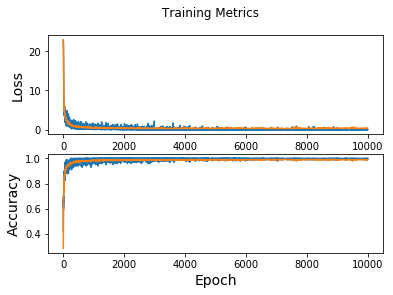

In [3]:
import matplotlib.pyplot as plt

# Affichage des tableaux qui récapitulent la variation des métriques durant l'entrainement
fig, axes = plt.subplots(2)
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)
axes[0].plot(test_loss_result)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
axes[1].plot(test_accuracy_results)
plt.show()